In [1]:
# slightly process metal output to draw manhattan plot
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
import matplotlib.animation as animation

In [2]:
from scipy.stats import norm

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
def getloclist(wd,end,filter_out):
    loc_list = []
    EIRA_found = False
    for root, dirs, files in os.walk(wd):
        for file in files:
            if file.endswith(end) and not file.endswith(filter_out):
                if root.split("/")[-2]=="EIRA":
                    loc = os.path.join(root, file)
                    loc_list.insert(0,loc)
                    EIRA_found = True
                else:
                    loc = os.path.join(root, file)
                    loc_list.append(loc) #get bim file location
    if EIRA_found == True:
        print("EIRA detected!")
    else:
        print("Warning! No EIRA bim detected! Use first scanned cohort as ref!")
    return loc_list

In [5]:
# summary_origin = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/METALresult_A1corr_noMAFfilter_Allcohorts_withPC1.TBL",sep='\t')
# summary_replicate = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/METALresult_A1corr_noMAFfilter_10cohorts_withPC1.TBL",sep='\t')
# plink_meta_10cohort = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_10cohorts_withPC.meta",sep='\s+')
# plink_meta = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC.meta",sep='\s+')
# defaultweight = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/METALresult_A1corr_noMAFfilter_10cohorts_withPC_defaultWeight1.TBL",sep='\t')
# gwas_samantha = pd.read_csv("/exports/reum/CKe/generic-metal/RunMeta/gwas_version8_merged.assoc.logistic",sep='\s+')
plink_meta_Leedsfixed = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC_Leedsfixed.meta",sep='\s+')
# summary_old = pd.read_csv("/exports/reum/CKe/generic-metal/RunMeta/results/METALresult_withTACERA_refEIRA1_noMiss.TBL",sep='\s+')

In [35]:
summary_old

,MarkerName,BP,CHR,Allele1,Allele2,Effect,OR,StdErr,P-value,Direction
0,2:32972867,32972867,2,a,g,0.1223,1.130093,0.0978,0.21100,+---+-++-
1,6:32410210,32410210,6,t,c,0.0591,1.060881,0.0623,0.34230,+-++--+++
2,22:42437366,42437366,22,g,g,-0.0181,0.982063,0.0483,0.70730,+++--+++-
3,6:27649763,27649763,6,c,g,-0.0667,0.935476,0.0727,0.35870,------++-
4,8:130204848,130204848,8,a,g,-0.0431,0.957816,0.0637,0.49880,-+-+--+--
...,...,...,...,...,...,...,...,...,...,...
731108,1:191087633,191087633,1,a,a,0.1037,1.109268,0.0561,0.06484,+-+-++-+-
731109,5:157011261,157011261,5,t,g,-0.0286,0.971805,0.0454,0.52920,--+--+--+
731110,7:105727907,105727907,7,a,g,0.0546,1.056118,0.0720,0.44800,+++-+-+--
731111,16:66158736,66158736,16,a,t,-0.1267,0.880998,0.0833,0.12820,---+-----


In [49]:
summary_origin

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction
0,11:16274555:C,NaN,NaN,-0.0743,0.1649,0.6523,??????????-???
1,6:73947097:T,NaN,NaN,-0.1009,0.3239,0.7554,+?-+-??-?-???-
2,1:62947229:C,NaN,NaN,-0.0701,0.1081,0.5165,-++--+-++++-?-
3,1:216223194:T,NaN,NaN,0.0440,1.4180,0.9752,+?????????????
4,1:164753374:G,NaN,NaN,0.2829,1.4160,0.8416,+?????????????
...,...,...,...,...,...,...,...
16043580,8:62110862:C,NaN,NaN,0.0219,0.0522,0.6740,-++---++--+--+
16043581,2:51581299:A,NaN,NaN,1.4757,1.6510,0.3714,????????????+?
16043582,8:50701824:T,NaN,NaN,1.0557,1.4260,0.4591,????+?????????
16043583,5:91184586:G,NaN,NaN,0.7237,1.6800,0.6666,??+???????????


In [6]:
suggestiveHits = summary_origin[summary_origin['P-value']<=1E-5]
len(suggestiveHits) #50, ? not removed

52

In [7]:
suggestiveHits

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction
44610,12:29082563:T,NaN,NaN,-0.2725,0.0614,9.185000e-06,-++---++------
520483,2:179448911:A,NaN,NaN,0.2689,0.0496,5.989000e-08,++-+++-+-+++++
1160238,2:179380165:G,NaN,NaN,0.2611,0.0581,7.065000e-06,++--++-+-++++-
1248219,2:179388994:G,NaN,NaN,0.2637,0.0566,3.218000e-06,++--++-+-++++-
1315300,2:48322467:G,NaN,NaN,0.2573,0.0577,8.212000e-06,+-+-+-++--++?+
1984208,2:179444939:T,NaN,NaN,0.2698,0.0528,3.228000e-07,++-+++-+-+++++
2058582,2:179514433:C,NaN,NaN,0.2430,0.0510,1.879000e-06,++-+++-+-+++?+
2214565,12:29088512:T,NaN,NaN,-0.2757,0.0617,7.860000e-06,-++---++------
2290080,13:86311267:G,NaN,NaN,0.5268,0.1107,1.944000e-06,++-+++++++?+?+
2502322,2:179458591:T,NaN,NaN,0.2713,0.0569,1.882000e-06,++--++-+-++++-


In [8]:
significant = summary_origin[summary_origin['P-value']<=5E-8]
len(significant) #? not removed

0

In [9]:
significant

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction


In [10]:
gwas_samantha

,CHR,SNP,BP,A1,TEST,NMISS,OR,SE,L95,U95,STAT,P
0,1,1:730087:T:C,730087,C,ADD,4040,1.2420,0.11870,0.9841,1.567,1.8250,0.06795
1,1,1:753541:G:A,753541,A,ADD,4116,1.0250,0.06572,0.9009,1.166,0.3719,0.71000
2,1,1:781845:A:G,781845,G,ADD,3945,1.0610,0.07727,0.9121,1.235,0.7689,0.44190
3,1,1:782981:C:T,782981,T,ADD,3969,1.0170,0.06784,0.8904,1.162,0.2488,0.80350
4,1,1:790465:G:A,790465,A,ADD,3895,1.0990,0.07943,0.9402,1.284,1.1840,0.23630
...,...,...,...,...,...,...,...,...,...,...,...,...
7660435,22,22:51221731:T:C,51221731,C,ADD,4244,1.0510,0.09129,0.8792,1.257,0.5495,0.58260
7660436,22,22:51222100:G:T,51222100,T,ADD,4254,1.0950,0.09875,0.9020,1.328,0.9151,0.36010
7660437,22,22:51223637:G:A,51223637,A,ADD,4249,1.0990,0.09901,0.9052,1.334,0.9537,0.34030
7660438,22,22:51229805:T:C,51229805,C,ADD,4242,1.0470,0.09124,0.8756,1.252,0.5038,0.61440


In [6]:
summary_replicate

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction
0,6:73947097:T,NaN,NaN,-0.0469,0.3365,0.8892,+?-+-??-?-
1,1:62947229:C,NaN,NaN,-0.0333,0.1212,0.7836,-++--+-+++
2,1:216223194:T,NaN,NaN,0.0440,1.4180,0.9752,+?????????
3,1:164753374:G,NaN,NaN,0.2829,1.4160,0.8416,+?????????
4,6:170451779:T,NaN,NaN,-0.7846,1.3810,0.5699,??-???????
...,...,...,...,...,...,...,...
12232190,3:30235852:T,NaN,NaN,0.6861,1.5220,0.6521,???+??????
12232191,8:62110862:C,NaN,NaN,0.0049,0.0582,0.9324,-++---++--
12232192,8:50701824:T,NaN,NaN,1.0557,1.4260,0.4591,????+?????
12232193,5:91184586:G,NaN,NaN,0.7237,1.6800,0.6666,??+???????


In [11]:
plink_meta

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I
0,1,693731,1:693731:G,G,?,11,0.62190,0.62190,1.0398,1.0398,0.7531,0.00
1,1,705882,1:705882:A,A,?,5,0.39180,0.39180,1.4027,1.4027,0.5642,0.00
2,1,706368,1:706368:G,G,?,5,0.57840,0.67950,1.1170,1.1319,0.2470,26.18
3,1,713977,1:713977:T,T,?,3,0.03283,0.03283,3.8098,3.8098,0.7492,0.00
4,1,714439,1:714439:A,A,?,4,0.06788,0.06788,3.2967,3.2967,0.8314,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8913185,22,51226692,22:51226692:A,A,?,2,0.44680,0.44680,1.7068,1.7068,0.5401,0.00
8913186,22,51229805,22:51229805:C,C,?,13,0.92950,0.92950,1.0077,1.0077,0.8599,0.00
8913187,22,51232488,22:51232488:G,G,?,8,0.48810,0.48810,1.1980,1.1980,0.4454,0.00
8913188,22,51237063,22:51237063:C,C,?,13,0.27680,0.27680,0.9360,0.9360,0.5234,0.00


In [56]:
plink_meta_Leedsfixed

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I
0,1,693731,1:693731:G,G,?,11,0.62190,0.62190,1.0398,1.0398,0.7531,0.00
1,1,705882,1:705882:A,A,?,5,0.39180,0.39180,1.4027,1.4027,0.5642,0.00
2,1,706368,1:706368:G,G,?,5,0.57840,0.67950,1.1170,1.1319,0.2470,26.18
3,1,713977,1:713977:T,T,?,3,0.03283,0.03283,3.8098,3.8098,0.7492,0.00
4,1,714439,1:714439:A,A,?,4,0.06788,0.06788,3.2967,3.2967,0.8314,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8913171,22,51226692,22:51226692:A,A,?,2,0.44680,0.44680,1.7068,1.7068,0.5401,0.00
8913172,22,51229805,22:51229805:C,C,?,13,0.92950,0.92950,1.0077,1.0077,0.8599,0.00
8913173,22,51232488,22:51232488:G,G,?,8,0.48810,0.48810,1.1980,1.1980,0.4454,0.00
8913174,22,51237063,22:51237063:C,C,?,13,0.27680,0.27680,0.9360,0.9360,0.5234,0.00


In [57]:
suggestiveHits_plink = plink_meta[plink_meta['P']<=1E-5].sort_values("P")
len(suggestiveHits_plink) #42

43

In [60]:
suggestiveHits_plink.loc[:,['SNP','A1','N','P','P(R)','OR','OR(R)','Q']]

,SNP,A1,N,P,P(R),OR,OR(R),Q
1469948,2:179448911:A,A,13,2.362000e-08,6.021000e-05,1.3347,1.3314,0.1774
1469811,2:179381715:C,C,13,1.012000e-07,1.735000e-04,1.3336,1.3322,0.1602
7591795,16:11223454:C,C,13,1.134000e-07,1.134000e-07,1.2592,1.2592,0.4695
1470017,2:179490478:C,C,12,2.243000e-07,9.359000e-04,1.3156,1.2892,0.1470
1469940,2:179444939:T,T,13,3.160000e-07,2.688000e-04,1.3258,1.3123,0.1816
1469938,2:179444137:G,G,13,4.759000e-07,2.289000e-04,1.3281,1.3174,0.2049
1469877,2:179411665:G,G,13,5.878000e-07,1.598000e-04,1.3264,1.3197,0.2283
1469913,2:179430997:A,A,13,9.292000e-07,3.712000e-04,1.3191,1.3100,0.1934
1469958,2:179457147:A,A,13,1.196000e-06,1.490000e-03,1.3347,1.3113,0.1357
1469961,2:179458591:T,T,13,1.196000e-06,1.490000e-03,1.3347,1.3113,0.1357


In [14]:
suggestiveHits_plink.loc[:,['SNP','CHR','BP']].to_csv("leadsnp.txt",sep='\t',index=False)

In [58]:
significant_plink = plink_meta[plink_meta['P']<=5E-8]
len(significant_plink) #1

1

In [61]:
significant_plink

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I
1469948,2,179448911,2:179448911:A,A,?,13,2.362000e-08,0.00006,1.3347,1.3314,0.1774,26.43


In [68]:
#DEPRECATED, WEIGHT DOES NOT MATTER HERE
defaultweight

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction
0,6:73947097:T,NaN,NaN,-0.0557,0.3365,0.86850,+?---??+-+
1,1:62947229:C,NaN,NaN,-0.2589,0.1212,0.03265,--++------
2,1:216223194:T,NaN,NaN,0.0440,1.4180,0.97520,+?????????
3,1:164753374:G,NaN,NaN,0.2829,1.4160,0.84160,+?????????
4,6:170451779:T,NaN,NaN,-0.7846,1.3810,0.56990,??-???????
...,...,...,...,...,...,...,...
12170071,3:30235852:T,NaN,NaN,-0.6860,1.5220,0.65220,???-??????
12170072,8:62110862:C,NaN,NaN,0.0219,0.0582,0.70730,--++-++-++
12170073,8:50701824:T,NaN,NaN,1.0557,1.4260,0.45910,????+?????
12170074,5:91184586:G,NaN,NaN,0.7237,1.6800,0.66660,??+???????


In [70]:
compare_weight = pd.merge(defaultweight,summary_replicate,how='left',on="MarkerName")
compare_weight

,MarkerName,Allele1_x,Allele2_x,Effect_x,StdErr_x,P-value_x,Direction_x,Allele1_y,Allele2_y,Effect_y,StdErr_y,P-value_y,Direction_y,cohort_support
0,6:73947097:T,NaN,NaN,-0.0557,0.3365,0.86850,+?---??+-+,NaN,NaN,-0.0557,0.3365,0.86850,+?---??+-+,3
1,1:62947229:C,NaN,NaN,-0.2589,0.1212,0.03265,--++------,NaN,NaN,-0.2589,0.1212,0.03265,--++------,0
2,1:216223194:T,NaN,NaN,0.0440,1.4180,0.97520,+?????????,NaN,NaN,0.0440,1.4180,0.97520,+?????????,9
3,1:164753374:G,NaN,NaN,0.2829,1.4160,0.84160,+?????????,NaN,NaN,0.2829,1.4160,0.84160,+?????????,9
4,6:170451779:T,NaN,NaN,-0.7846,1.3810,0.56990,??-???????,NaN,NaN,-0.7846,1.3810,0.56990,??-???????,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12170071,3:30235852:T,NaN,NaN,-0.6860,1.5220,0.65220,???-??????,NaN,NaN,-0.6860,1.5220,0.65220,???-??????,9
12170072,8:62110862:C,NaN,NaN,0.0219,0.0582,0.70730,--++-++-++,NaN,NaN,0.0219,0.0582,0.70730,--++-++-++,0
12170073,8:50701824:T,NaN,NaN,1.0557,1.4260,0.45910,????+?????,NaN,NaN,1.0557,1.4260,0.45910,????+?????,9
12170074,5:91184586:G,NaN,NaN,0.7237,1.6800,0.66660,??+???????,NaN,NaN,0.7237,1.6800,0.66660,??+???????,9


In [71]:
compare_weight[compare_weight['Effect_x']!=compare_weight['Effect_y']]

,MarkerName,Allele1_x,Allele2_x,Effect_x,StdErr_x,P-value_x,Direction_x,Allele1_y,Allele2_y,Effect_y,StdErr_y,P-value_y,Direction_y,cohort_support


In [72]:
compare_weight[compare_weight['StdErr_x']!=compare_weight['StdErr_y']]

,MarkerName,Allele1_x,Allele2_x,Effect_x,StdErr_x,P-value_x,Direction_x,Allele1_y,Allele2_y,Effect_y,StdErr_y,P-value_y,Direction_y,cohort_support


In [73]:
compare_weight[compare_weight['P-value_x']!=compare_weight['P-value_y']]

,MarkerName,Allele1_x,Allele2_x,Effect_x,StdErr_x,P-value_x,Direction_x,Allele1_y,Allele2_y,Effect_y,StdErr_y,P-value_y,Direction_y,cohort_support


In [140]:
summary_replicate[summary_replicate['MarkerName']=='5:7314667:A']

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR,Direction
85,5:7314667:A,NaN,NaN,-1.0035,0.923,0.277,0.366594,??-???????-


In [34]:
OR = np.exp(summary_old['Effect'])
summary_old.insert(6,'OR',OR)

In [50]:
OR = np.exp(summary_origin['Effect'])
summary_origin.insert(6,'OR',OR)

In [11]:
OR = np.exp(summary_replicate['Effect'])
summary_replicate.insert(6,'OR',OR)

In [51]:
SNP = gwas_samantha['SNP'].str.split(':',expand=True)[0]+":"+gwas_samantha['SNP'].str.split(':',expand=True)[1]+":"+gwas_samantha['A1']
gwas_samantha['SNP'] = SNP

In [52]:
SNP = summary_origin['MarkerName'].str.split(':',expand=True)[0]+":"+summary_origin['MarkerName'].str.split(':',expand=True)[1]+":"+summary_origin['Allele1'].str.upper()
summary_origin['MarkerName'] = SNP

AttributeError: Can only use .str accessor with string values!

In [53]:
#check carefully how it's generated before using Merged variable
Merged = pd.merge(plink_meta,gwas_samantha,left_on=['SNP'],right_on=['SNP'],how='inner',suffixes=("_latest_meta","_Samantha"))
Merged

,CHR_latest_meta,BP_latest_meta,SNP,A1_latest_meta,A2,N,P_latest_meta,P(R),OR_latest_meta,OR(R),Q,I,CHR_Samantha,BP_Samantha,A1_Samantha,TEST,NMISS,OR_Samantha,SE,L95,U95,STAT,P_Samantha
0,1,730087,1:730087:C,C,?,11,0.1548,0.2011,1.1875,1.1730,0.4271,1.52,1,730087,C,ADD,4040,1.2420,0.11870,0.9841,1.567,1.8250,0.06795
1,1,753541,1:753541:A,A,?,11,0.6465,0.6465,1.0304,1.0304,0.7882,0.00,1,753541,A,ADD,4116,1.0250,0.06572,0.9009,1.166,0.3719,0.71000
2,1,781845,1:781845:G,G,?,11,0.4722,0.4722,1.0573,1.0573,0.8883,0.00,1,781845,G,ADD,3945,1.0610,0.07727,0.9121,1.235,0.7689,0.44190
3,1,782981,1:782981:T,T,?,11,0.6866,0.6866,1.0277,1.0277,0.9168,0.00,1,782981,T,ADD,3969,1.0170,0.06784,0.8904,1.162,0.2488,0.80350
4,1,790465,1:790465:A,A,?,12,0.3107,0.3107,1.0843,1.0843,0.8910,0.00,1,790465,A,ADD,3895,1.0990,0.07943,0.9402,1.284,1.1840,0.23630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663771,22,51221731,22:51221731:C,C,?,13,0.9404,0.9404,1.0065,1.0065,0.7976,0.00,22,51221731,C,ADD,4244,1.0510,0.09129,0.8792,1.257,0.5495,0.58260
4663772,22,51222100,22:51222100:T,T,?,13,0.1191,0.1191,1.1588,1.1588,0.8584,0.00,22,51222100,T,ADD,4254,1.0950,0.09875,0.9020,1.328,0.9151,0.36010
4663773,22,51223637,22:51223637:A,A,?,13,0.1216,0.1216,1.1583,1.1583,0.8415,0.00,22,51223637,A,ADD,4249,1.0990,0.09901,0.9052,1.334,0.9537,0.34030
4663774,22,51229805,22:51229805:C,C,?,13,0.9295,0.9295,1.0077,1.0077,0.8599,0.00,22,51229805,C,ADD,4242,1.0470,0.09124,0.8756,1.252,0.5038,0.61440


In [20]:
tophits_METAL = summary_origin.sort_values(['P-value'])[:10000]
tophits_latest_meta	 = plink_meta.sort_values(['P'])[:10000] #fixed effect model
# tophits_latest_meta_random	 = plink_meta.sort_values(['P(R)'])[:10000] #Random effect model
tophits_Samantha = gwas_samantha.sort_values(['P'])[:10000]

In [48]:
tophits_latest_meta

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I
1470567,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89
1470430,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20
1470636,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21
7594852,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00
1470559,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18
...,...,...,...,...,...,...,...,...,...,...,...,...
3721349,6,70202089,6:70202089:T,T,?,13,1.832000e-03,4.845000e-02,1.2823,1.3007,0.0571,41.65
8720317,21,24967394,21:24967394:C,C,?,12,1.832000e-03,1.552000e-02,1.5635,1.4922,0.3447,10.25
6895732,13,81176568,13:81176568:G,G,?,13,1.832000e-03,1.832000e-03,0.8443,0.8443,0.6214,0.00
8190818,18,47715344,18:47715344:G,G,?,13,1.832000e-03,4.512000e-03,1.1434,1.1627,0.2955,14.79


In [55]:
tophits_Samantha

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_latest_meta_x,Direction,CHR,SNP,BP,A1,TEST_x,NMISS_x,OR_Samantha_x,SE_x,L95_x,U95_x,STAT_x,P,CHR_latest_meta,BP_latest_meta,A1_latest_meta,A2,N,P_latest_meta,P(R),OR_latest_meta_y,OR(R),Q,I,CHR_Samantha,BP_Samantha,A1_Samantha,TEST_y,NMISS_y,OR_Samantha_y,SE_y,L95_y,U95_y,STAT_y,P_Samantha
0,16:77704820:T,NaN,NaN,0.0649,0.1927,0.736500,1.067052,??????????+???,16,16:77704820:T,77704820,T,ADD,4321,0.7147,0.06649,0.6274,0.8142,-5.051,4.384000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8:74435989:C,NaN,NaN,0.3234,0.0705,0.000004,1.381818,+++++++++---?-,8,8:74435989:C,74435989,C,ADD,4324,1.4450,0.07361,1.2510,1.6690,5.000,5.746000e-07,8.0,74435989.0,C,?,12.0,0.000001,0.000001,1.4249,1.4249,0.6245,0.00,8.0,74435989.0,C,ADD,4324.0,1.4450,0.07361,1.2510,1.6690,5.000,5.746000e-07
2,21:43142744:A,NaN,NaN,-0.2149,0.0498,0.000016,0.806622,--+----+-??+?-,21,21:43142744:A,43142744,A,ADD,3491,0.7782,0.05025,0.7052,0.8587,-4.991,6.016000e-07,21.0,43142744.0,A,?,11.0,0.000016,0.000016,0.8066,0.8066,0.8228,0.00,21.0,43142744.0,A,ADD,3491.0,0.7782,0.05025,0.7052,0.8587,-4.991,6.016000e-07
3,6:69670142:C,NaN,NaN,0.2033,0.0450,0.000006,1.225440,+++++++-+-+-?-,6,6:69670142:C,69670142,C,ADD,4299,1.2690,0.04802,1.1550,1.3940,4.955,7.220000e-07,6.0,69670142.0,C,?,12.0,0.000007,0.000088,1.2381,1.2298,0.3832,6.33,6.0,69670142.0,C,ADD,4299.0,1.2690,0.04802,1.1550,1.3940,4.955,7.220000e-07
4,16:77699753:A,NaN,NaN,0.0305,0.2031,0.880500,1.030970,??????????+???,16,16:77699753:A,77699753,A,ADD,4264,0.7216,0.06684,0.6330,0.8226,-4.881,1.055000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21:47466158:A,NaN,NaN,0.1459,0.0668,0.028930,1.157080,+-?++++-++-+?-,21,21:47466158:A,47466158,A,ADD,4099,1.2570,0.07105,1.0940,1.4450,3.224,1.264000e-03,21.0,47466158.0,A,?,11.0,0.013900,0.106800,1.1894,1.2232,0.0270,50.62,21.0,47466158.0,A,ADD,4099.0,1.2570,0.07105,1.0940,1.4450,3.224,1.264000e-03
9996,9:27969212:C,NaN,NaN,0.5563,0.1667,0.000846,1.744207,++++++-+??-+?-,9,9:27969212:C,27969212,C,ADD,4321,1.7500,0.17360,1.2450,2.4600,3.224,1.264000e-03,9.0,27969212.0,C,?,10.0,0.000199,0.000199,1.9262,1.9262,0.8238,0.00,9.0,27969212.0,C,ADD,4321.0,1.7500,0.17360,1.2450,2.4600,3.224,1.264000e-03
9997,13:23600969:G,NaN,NaN,-0.1094,0.0482,0.023130,0.896372,---+----+++-?+,13,13:23600969:G,23600969,G,ADD,4085,0.8473,0.05140,0.7661,0.9371,-3.224,1.264000e-03,13.0,23600969.0,G,?,12.0,0.012120,0.045630,0.8804,0.8484,0.0881,37.95,13.0,23600969.0,G,ADD,4085.0,0.8473,0.05140,0.7661,0.9371,-3.224,1.264000e-03
9998,4:162157026:C,NaN,NaN,-0.0952,0.2428,0.695000,0.909191,??????????-???,4,4:162157026:C,162157026,C,ADD,4264,0.7746,0.07923,0.6632,0.9047,-3.224,1.264000e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
common_snp = pd.merge(tophits_latest_meta,tophits_Samantha,how='inner',left_on="SNP",right_on='SNP')
# common_snp = pd.merge(tophits_latest_meta,tophits_Samantha,how='inner',left_on="SNP",right_on='SNP')
common_snp

,CHR_x,BP_x,SNP,A1_x,A2,N,P_x,P(R),OR,OR(R),Q,I,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_latest_meta,Direction,CHR_y,BP_y,A1_y,TEST,NMISS,OR_Samantha,SE,L95,U95,STAT,P_y
0,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89,2:179448911:A,NaN,NaN,0.2709,0.0494,4.184000e-08,1.311144,++-+++-+-+++++,2,179448911,A,ADD,4334,1.2630,0.05342,1.137,1.4020,4.365,0.000013
1,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20,2:179381715:C,NaN,NaN,0.2688,0.0517,1.966000e-07,1.308393,++-+++-+-+++++,2,179381715,C,ADD,4312,1.2670,0.05546,1.137,1.4130,4.273,0.000019
2,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21,2:179490478:C,NaN,NaN,0.2615,0.0505,2.277000e-07,1.298877,++-+++-+-+++?+,2,179490478,C,ADD,4326,1.2610,0.05333,1.136,1.4000,4.351,0.000014
3,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00,16:11223454:C,NaN,NaN,0.2195,0.0411,9.398000e-08,1.245454,++++++++++++++,16,11223454,C,ADD,4295,1.2010,0.04443,1.101,1.3110,4.128,0.000037
4,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18,2:179444939:T,NaN,NaN,0.2724,0.0526,2.198000e-07,1.313112,++-+++-+-+++++,2,179444939,T,ADD,4337,1.2520,0.05700,1.120,1.4000,3.943,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,7,149701318,7:149701318:G,G,?,11,1.822000e-03,1.362000e-02,0.8649,0.8746,0.3564,9.21,7:149701318:G,NaN,NaN,-0.1452,0.0466,1.822000e-03,0.864849,-+?---+++-?+?+,7,149701318,G,ADD,3971,0.8577,0.04709,0.782,0.9406,-3.261,0.001112
2961,8,115451577,8:115451577:G,G,?,12,1.823000e-03,1.823000e-03,1.2134,1.2134,0.5914,0.00,8:115451577:G,NaN,NaN,0.1554,0.0594,8.848000e-03,1.168125,+--+++--++--?+,8,115451577,G,ADD,4246,1.2440,0.06239,1.101,1.4060,3.501,0.000463
2962,17,42068319,17:42068319:T,T,?,10,1.828000e-03,1.828000e-03,2.9796,2.9796,0.8794,0.00,17:42068319:T,NaN,NaN,1.0918,0.3503,1.828000e-03,2.979633,+?++++-+++???-,17,42068319,T,ADD,4329,2.9550,0.32010,1.578,5.5330,3.385,0.000713
2963,8,11858058,8:11858058:G,G,?,11,1.831000e-03,1.831000e-03,1.1624,1.1624,0.7219,0.00,8:11858058:G,NaN,NaN,0.1245,0.0455,6.173000e-03,1.132582,++-++++-+?-+?-,8,11858058,G,ADD,3865,1.1960,0.04834,1.088,1.3150,3.704,0.000212


In [52]:
# tophits_latest_meta = pd.merge(tophits_latest_meta,Merged,how='left',on="MarkerName")
tophits_latest_meta = pd.merge(tophits_latest_meta,Merged,how='left',on="SNP")
tophits_latest_meta

,CHR,BP,SNP,A1,A2_x,N_x,P,P(R)_x,OR,OR(R)_x,Q_x,I_x,CHR_latest_meta,BP_latest_meta,A1_latest_meta,A2_y,N_y,P_latest_meta,P(R)_y,OR_latest_meta,OR(R)_y,Q_y,I_y,CHR_Samantha,BP_Samantha,A1_Samantha,TEST,NMISS,OR_Samantha,SE,L95,U95,STAT,P_Samantha
0,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89,2.0,179448911.0,A,?,13.0,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89,2.0,179448911.0,A,ADD,4334.0,1.2630,0.05342,1.1370,1.402,4.365,0.000013
1,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20,2.0,179381715.0,C,?,13.0,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20,2.0,179381715.0,C,ADD,4312.0,1.2670,0.05546,1.1370,1.413,4.273,0.000019
2,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21,2.0,179490478.0,C,?,12.0,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21,2.0,179490478.0,C,ADD,4326.0,1.2610,0.05333,1.1360,1.400,4.351,0.000014
3,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00,16.0,11223454.0,C,?,13.0,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00,16.0,11223454.0,C,ADD,4295.0,1.2010,0.04443,1.1010,1.311,4.128,0.000037
4,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18,2.0,179444939.0,T,?,13.0,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18,2.0,179444939.0,T,ADD,4337.0,1.2520,0.05700,1.1200,1.400,3.943,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,70202089,6:70202089:T,T,?,13,1.832000e-03,4.845000e-02,1.2823,1.3007,0.0571,41.65,6.0,70202089.0,T,?,13.0,1.832000e-03,4.845000e-02,1.2823,1.3007,0.0571,41.65,6.0,70202089.0,T,ADD,4312.0,1.2960,0.08143,1.1050,1.520,3.185,0.001448
9996,21,24967394,21:24967394:C,C,?,12,1.832000e-03,1.552000e-02,1.5635,1.4922,0.3447,10.25,21.0,24967394.0,C,?,12.0,1.832000e-03,1.552000e-02,1.5635,1.4922,0.3447,10.25,21.0,24967394.0,C,ADD,4326.0,1.7330,0.14410,1.3060,2.298,3.814,0.000137
9997,13,81176568,13:81176568:G,G,?,13,1.832000e-03,1.832000e-03,0.8443,0.8443,0.6214,0.00,13.0,81176568.0,G,?,13.0,1.832000e-03,1.832000e-03,0.8443,0.8443,0.6214,0.00,13.0,81176568.0,G,ADD,4256.0,0.8723,0.05626,0.7813,0.974,-2.427,0.015210
9998,18,47715344,18:47715344:G,G,?,13,1.832000e-03,4.512000e-03,1.1434,1.1627,0.2955,14.79,18.0,47715344.0,G,?,13.0,1.832000e-03,4.512000e-03,1.1434,1.1627,0.2955,14.79,18.0,47715344.0,G,ADD,4293.0,1.1270,0.04457,1.0320,1.229,2.675,0.007464


In [53]:
tophits_Samantha = pd.merge(tophits_Samantha,Merged,how='left',left_on="SNP",right_on="SNP")
tophits_Samantha

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_latest_meta_x,Direction,CHR,SNP,BP,A1,TEST_x,NMISS_x,OR_Samantha_x,SE_x,L95_x,U95_x,STAT_x,P,CHR_latest_meta,BP_latest_meta,A1_latest_meta,A2,N,P_latest_meta,P(R),OR_latest_meta_y,OR(R),Q,I,CHR_Samantha,BP_Samantha,A1_Samantha,TEST_y,NMISS_y,OR_Samantha_y,SE_y,L95_y,U95_y,STAT_y,P_Samantha
0,16:77704820:T,NaN,NaN,0.0649,0.1927,0.736500,1.067052,??????????+???,16,16:77704820:T,77704820,T,ADD,4321,0.7147,0.06649,0.6274,0.8142,-5.051,4.384000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8:74435989:C,NaN,NaN,0.3234,0.0705,0.000004,1.381818,+++++++++---?-,8,8:74435989:C,74435989,C,ADD,4324,1.4450,0.07361,1.2510,1.6690,5.000,5.746000e-07,8.0,74435989.0,C,?,12.0,0.000001,0.000001,1.4249,1.4249,0.6245,0.00,8.0,74435989.0,C,ADD,4324.0,1.4450,0.07361,1.2510,1.6690,5.000,5.746000e-07
2,21:43142744:A,NaN,NaN,-0.2149,0.0498,0.000016,0.806622,--+----+-??+?-,21,21:43142744:A,43142744,A,ADD,3491,0.7782,0.05025,0.7052,0.8587,-4.991,6.016000e-07,21.0,43142744.0,A,?,11.0,0.000016,0.000016,0.8066,0.8066,0.8228,0.00,21.0,43142744.0,A,ADD,3491.0,0.7782,0.05025,0.7052,0.8587,-4.991,6.016000e-07
3,6:69670142:C,NaN,NaN,0.2033,0.0450,0.000006,1.225440,+++++++-+-+-?-,6,6:69670142:C,69670142,C,ADD,4299,1.2690,0.04802,1.1550,1.3940,4.955,7.220000e-07,6.0,69670142.0,C,?,12.0,0.000007,0.000088,1.2381,1.2298,0.3832,6.33,6.0,69670142.0,C,ADD,4299.0,1.2690,0.04802,1.1550,1.3940,4.955,7.220000e-07
4,16:77699753:A,NaN,NaN,0.0305,0.2031,0.880500,1.030970,??????????+???,16,16:77699753:A,77699753,A,ADD,4264,0.7216,0.06684,0.6330,0.8226,-4.881,1.055000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21:47466158:A,NaN,NaN,0.1459,0.0668,0.028930,1.157080,+-?++++-++-+?-,21,21:47466158:A,47466158,A,ADD,4099,1.2570,0.07105,1.0940,1.4450,3.224,1.264000e-03,21.0,47466158.0,A,?,11.0,0.013900,0.106800,1.1894,1.2232,0.0270,50.62,21.0,47466158.0,A,ADD,4099.0,1.2570,0.07105,1.0940,1.4450,3.224,1.264000e-03
9996,9:27969212:C,NaN,NaN,0.5563,0.1667,0.000846,1.744207,++++++-+??-+?-,9,9:27969212:C,27969212,C,ADD,4321,1.7500,0.17360,1.2450,2.4600,3.224,1.264000e-03,9.0,27969212.0,C,?,10.0,0.000199,0.000199,1.9262,1.9262,0.8238,0.00,9.0,27969212.0,C,ADD,4321.0,1.7500,0.17360,1.2450,2.4600,3.224,1.264000e-03
9997,13:23600969:G,NaN,NaN,-0.1094,0.0482,0.023130,0.896372,---+----+++-?+,13,13:23600969:G,23600969,G,ADD,4085,0.8473,0.05140,0.7661,0.9371,-3.224,1.264000e-03,13.0,23600969.0,G,?,12.0,0.012120,0.045630,0.8804,0.8484,0.0881,37.95,13.0,23600969.0,G,ADD,4085.0,0.8473,0.05140,0.7661,0.9371,-3.224,1.264000e-03
9998,4:162157026:C,NaN,NaN,-0.0952,0.2428,0.695000,0.909191,??????????-???,4,4:162157026:C,162157026,C,ADD,4264,0.7746,0.07923,0.6632,0.9047,-3.224,1.264000e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#plot METAL vs Pooled run
Merged = pd.merge(summary_origin,gwas_samantha,left_on=['MarkerName'],right_on=['SNP'],how='inner',suffixes=("_latest_meta","_Samantha"))
Merged

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_latest_meta,Direction,CHR,SNP,BP,A1,TEST,NMISS,OR_Samantha,SE,L95,U95,STAT,P
0,11:16274555:C,NaN,NaN,-0.0743,0.1649,0.65230,0.928393,??????????-???,11,11:16274555:C,16274555,C,ADD,4307,0.9569,0.05492,0.8592,1.066,-0.80240,0.422300
1,6:73947097:T,NaN,NaN,-0.0883,0.3232,0.78470,0.915486,+?-+-??-?-???-,6,6:73947097:T,73947097,T,ADD,4301,0.7583,0.29470,0.4256,1.351,-0.93890,0.347800
2,1:62947229:C,NaN,NaN,-0.0570,0.1077,0.59670,0.944594,-++--+-++++-?-,1,1:62947229:C,62947229,C,ADD,4316,0.9138,0.11510,0.7292,1.145,-0.78370,0.433200
3,10:8380278:C,NaN,NaN,-0.0354,0.2040,0.86220,0.965219,??????????-???,10,10:8380278:C,8380278,C,ADD,4268,1.0340,0.07233,0.8976,1.192,0.46710,0.640500
4,2:80640397:G,NaN,NaN,-0.0061,0.0915,0.94650,0.993919,----+++---++?-,2,2:80640397:G,80640397,G,ADD,4250,1.0020,0.09874,0.8258,1.216,0.02136,0.983000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595879,16:62295269:T,NaN,NaN,0.0566,0.0561,0.31310,1.058232,+-+++-+++++-++,16,16:62295269:T,62295269,T,ADD,4332,1.0090,0.06156,0.8942,1.138,0.14360,0.885800
7595880,2:233111433:A,NaN,NaN,0.0389,0.0562,0.48830,1.039667,-+--++++--++-+,2,2:233111433:A,233111433,A,ADD,4297,1.0470,0.06147,0.9282,1.181,0.74790,0.454500
7595881,18:39747300:G,NaN,NaN,-0.0898,0.0528,0.08913,0.914114,----+-+---+-++,18,18:39747300:G,39747300,G,ADD,4326,0.8565,0.05767,0.7649,0.959,-2.68700,0.007218
7595882,8:130860372:A,NaN,NaN,-0.2454,0.4014,0.54100,0.782392,??????????-???,8,8:130860372:A,130860372,A,ADD,4320,1.1310,0.16340,0.8208,1.558,0.75170,0.452200


In [18]:
tophits_METAL = Merged.sort_values(['P-value'])[:10000]
tophits_Samantha = Merged.sort_values(['P'])[:10000]
common_snp = pd.merge(tophits_METAL,tophits_Samantha,how='inner',left_on="MarkerName",right_on='SNP')
common_snp

,MarkerName_x,Allele1_x,Allele2_x,Effect_x,StdErr_x,P-value_x,OR_latest_meta_x,Direction_x,CHR_x,SNP_x,BP_x,A1_x,TEST_x,NMISS_x,OR_Samantha_x,SE_x,L95_x,U95_x,STAT_x,P_x,MarkerName_y,Allele1_y,Allele2_y,Effect_y,StdErr_y,P-value_y,OR_latest_meta_y,Direction_y,CHR_y,SNP_y,BP_y,A1_y,TEST_y,NMISS_y,OR_Samantha_y,SE_y,L95_y,U95_y,STAT_y,P_y
0,2:179448911:A,NaN,NaN,0.2709,0.0494,4.184000e-08,1.311144,++-+++-+-+++++,2,2:179448911:A,179448911,A,ADD,4334,1.2630,0.05342,1.1370,1.4020,4.365,0.000013,2:179448911:A,NaN,NaN,0.2709,0.0494,4.184000e-08,1.311144,++-+++-+-+++++,2,2:179448911:A,179448911,A,ADD,4334,1.2630,0.05342,1.1370,1.4020,4.365,0.000013
1,16:11223454:C,NaN,NaN,0.2195,0.0411,9.398000e-08,1.245454,++++++++++++++,16,16:11223454:C,11223454,C,ADD,4295,1.2010,0.04443,1.1010,1.3110,4.128,0.000037,16:11223454:C,NaN,NaN,0.2195,0.0411,9.398000e-08,1.245454,++++++++++++++,16,16:11223454:C,11223454,C,ADD,4295,1.2010,0.04443,1.1010,1.3110,4.128,0.000037
2,2:179381715:C,NaN,NaN,0.2688,0.0517,1.966000e-07,1.308393,++-+++-+-+++++,2,2:179381715:C,179381715,C,ADD,4312,1.2670,0.05546,1.1370,1.4130,4.273,0.000019,2:179381715:C,NaN,NaN,0.2688,0.0517,1.966000e-07,1.308393,++-+++-+-+++++,2,2:179381715:C,179381715,C,ADD,4312,1.2670,0.05546,1.1370,1.4130,4.273,0.000019
3,2:179444939:T,NaN,NaN,0.2724,0.0526,2.198000e-07,1.313112,++-+++-+-+++++,2,2:179444939:T,179444939,T,ADD,4337,1.2520,0.05700,1.1200,1.4000,3.943,0.000080,2:179444939:T,NaN,NaN,0.2724,0.0526,2.198000e-07,1.313112,++-+++-+-+++++,2,2:179444939:T,179444939,T,ADD,4337,1.2520,0.05700,1.1200,1.4000,3.943,0.000080
4,2:179490478:C,NaN,NaN,0.2615,0.0505,2.277000e-07,1.298877,++-+++-+-+++?+,2,2:179490478:C,179490478,C,ADD,4326,1.2610,0.05333,1.1360,1.4000,4.351,0.000014,2:179490478:C,NaN,NaN,0.2615,0.0505,2.277000e-07,1.298877,++-+++-+-+++?+,2,2:179490478:C,179490478,C,ADD,4326,1.2610,0.05333,1.1360,1.4000,4.351,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,2:233239272:T,NaN,NaN,0.5582,0.1752,1.448000e-03,1.747524,+??++-+-++?-??,2,2:233239272:T,233239272,T,ADD,4331,1.7750,0.16690,1.2800,2.4620,3.440,0.000581,2:233239272:T,NaN,NaN,0.5582,0.1752,1.448000e-03,1.747524,+??++-+-++?-??,2,2:233239272:T,233239272,T,ADD,4331,1.7750,0.16690,1.2800,2.4620,3.440,0.000581
2159,6:55324570:T,NaN,NaN,0.2412,0.0757,1.448000e-03,1.272776,++++++++-+++?+,6,6:55324570:T,55324570,T,ADD,4320,1.3070,0.08064,1.1160,1.5300,3.317,0.000910,6:55324570:T,NaN,NaN,0.2412,0.0757,1.448000e-03,1.272776,++++++++-+++?+,6,6:55324570:T,55324570,T,ADD,4320,1.3070,0.08064,1.1160,1.5300,3.317,0.000910
2160,6:55323525:T,NaN,NaN,0.2412,0.0757,1.448000e-03,1.272776,++++++++-+++?+,6,6:55323525:T,55323525,T,ADD,4320,1.3070,0.08064,1.1160,1.5300,3.317,0.000910,6:55323525:T,NaN,NaN,0.2412,0.0757,1.448000e-03,1.272776,++++++++-+++?+,6,6:55323525:T,55323525,T,ADD,4320,1.3070,0.08064,1.1160,1.5300,3.317,0.000910
2161,6:55324430:C,NaN,NaN,0.2412,0.0757,1.448000e-03,1.272776,++++++++-+++?+,6,6:55324430:C,55324430,C,ADD,4320,1.3070,0.08064,1.1160,1.5300,3.317,0.000910,6:55324430:C,NaN,NaN,0.2412,0.0757,1.448000e-03,1.272776,++++++++-+++?+,6,6:55324430:C,55324430,C,ADD,4320,1.3070,0.08064,1.1160,1.5300,3.317,0.000910


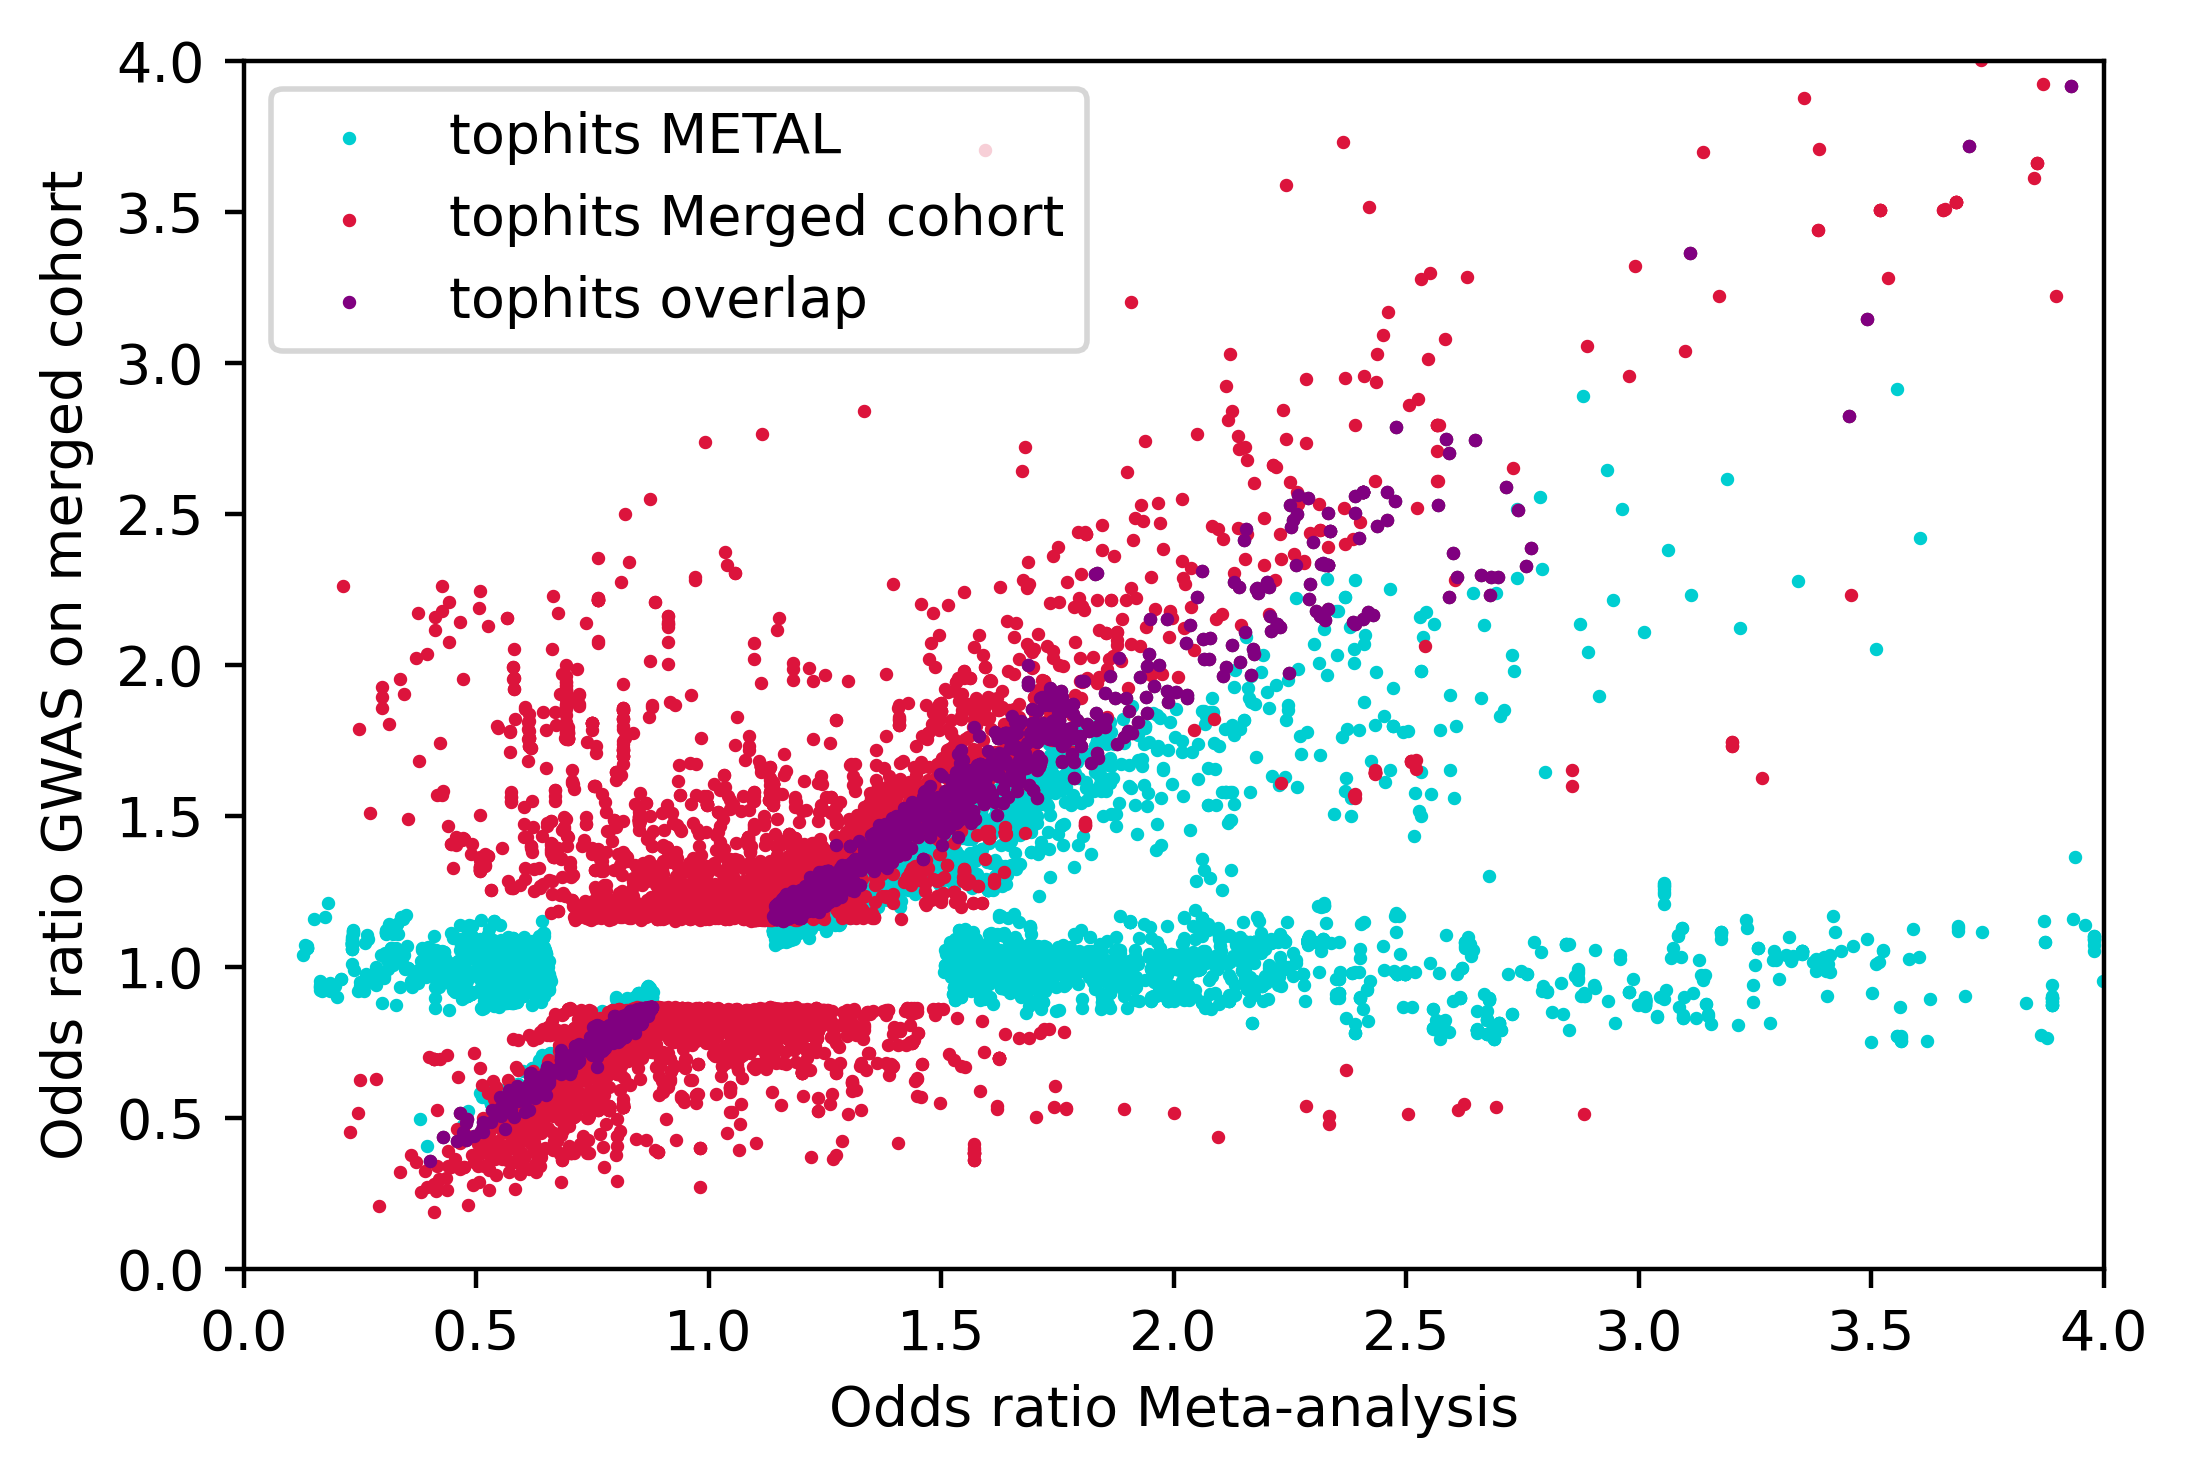

In [32]:
#SCATTER PLOT Odds ratio
#METAL top 10k snps, 14 cohorts
plt.figure(dpi=400)
plt.xlabel('Odds ratio Meta-analysis')
plt.ylabel('Odds ratio GWAS on merged cohort')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])

colors1 = '#00CED1'
colors2 = '#DC143C'
colors3 = 'Purple'
plt.xlim([0,4])
plt.ylim([0,4])
plt.scatter(tophits_METAL['OR_latest_meta'],tophits_METAL['OR_Samantha'],c=colors1,label='tophits METAL',s=2)
plt.scatter(tophits_Samantha['OR_latest_meta'],tophits_Samantha['OR_Samantha'],c=colors2,label='tophits Merged cohort',s=2)
plt.scatter(common_snp['OR_latest_meta_x'],common_snp['OR_Samantha_y'],c=colors3,label='tophits overlap',s=2)

# plt.scatter(,c=colors2,label='Samantha\'s GWAS')

plt.legend()
plt.show()
#Low stability

In [54]:
#Plink fixed effect vs Samantha
Merged = pd.merge(plink_meta,gwas_samantha,left_on=['SNP'],right_on=['SNP'],how='inner',suffixes=("_latest_meta","_Samantha"))
# Merged
tophits_latest_meta = Merged.sort_values(['P_latest_meta'])[:10000]
tophits_Samantha = Merged.sort_values(['P_Samantha'])[:10000]
common_snp = pd.merge(tophits_latest_meta,tophits_Samantha,how='inner',left_on="SNP",right_on='SNP')
common_snp

,CHR_latest_meta_x,BP_latest_meta_x,SNP,A1_latest_meta_x,A2_x,N_x,P_latest_meta_x,P(R)_x,OR_latest_meta_x,OR(R)_x,Q_x,I_x,CHR_Samantha_x,BP_Samantha_x,A1_Samantha_x,TEST_x,NMISS_x,OR_Samantha_x,SE_x,L95_x,U95_x,STAT_x,P_Samantha_x,CHR_latest_meta_y,BP_latest_meta_y,A1_latest_meta_y,A2_y,N_y,P_latest_meta_y,P(R)_y,OR_latest_meta_y,OR(R)_y,Q_y,I_y,CHR_Samantha_y,BP_Samantha_y,A1_Samantha_y,TEST_y,NMISS_y,OR_Samantha_y,SE_y,L95_y,U95_y,STAT_y,P_Samantha_y
0,2,179448911,2:179448911:A,A,?,13,2.362000e-08,6.021000e-05,1.3347,1.3314,0.1774,26.43,2,179448911,A,ADD,4334,1.2630,0.05342,1.1370,1.4020,4.365,0.000013,2,179448911,A,?,13,2.362000e-08,6.021000e-05,1.3347,1.3314,0.1774,26.43,2,179448911,A,ADD,4334,1.2630,0.05342,1.1370,1.4020,4.365,0.000013
1,2,179381715,2:179381715:C,C,?,13,1.012000e-07,1.735000e-04,1.3336,1.3322,0.1602,28.25,2,179381715,C,ADD,4312,1.2670,0.05546,1.1370,1.4130,4.273,0.000019,2,179381715,C,?,13,1.012000e-07,1.735000e-04,1.3336,1.3322,0.1602,28.25,2,179381715,C,ADD,4312,1.2670,0.05546,1.1370,1.4130,4.273,0.000019
2,16,11223454,16:11223454:C,C,?,13,1.134000e-07,1.134000e-07,1.2592,1.2592,0.4695,0.00,16,11223454,C,ADD,4295,1.2010,0.04443,1.1010,1.3110,4.128,0.000037,16,11223454,C,?,13,1.134000e-07,1.134000e-07,1.2592,1.2592,0.4695,0.00,16,11223454,C,ADD,4295,1.2010,0.04443,1.1010,1.3110,4.128,0.000037
3,2,179490478,2:179490478:C,C,?,12,2.243000e-07,9.359000e-04,1.3156,1.2892,0.1470,30.57,2,179490478,C,ADD,4326,1.2610,0.05333,1.1360,1.4000,4.351,0.000014,2,179490478,C,?,12,2.243000e-07,9.359000e-04,1.3156,1.2892,0.1470,30.57,2,179490478,C,ADD,4326,1.2610,0.05333,1.1360,1.4000,4.351,0.000014
4,2,179444939,2:179444939:T,T,?,13,3.160000e-07,2.688000e-04,1.3258,1.3123,0.1816,26.00,2,179444939,T,ADD,4337,1.2520,0.05700,1.1200,1.4000,3.943,0.000080,2,179444939,T,?,13,3.160000e-07,2.688000e-04,1.3258,1.3123,0.1816,26.00,2,179444939,T,ADD,4337,1.2520,0.05700,1.1200,1.4000,3.943,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,15,89064819,15:89064819:A,A,?,13,2.232000e-03,9.267000e-03,1.1944,1.1942,0.3362,10.88,15,89064819,A,ADD,4335,1.2220,0.05964,1.0870,1.3740,3.365,0.000765,15,89064819,A,?,13,2.232000e-03,9.267000e-03,1.1944,1.1942,0.3362,10.88,15,89064819,A,ADD,4335,1.2220,0.05964,1.0870,1.3740,3.365,0.000765
4471,12,2553988,12:2553988:G,G,?,12,2.233000e-03,1.267000e-01,0.8439,0.8833,0.1478,30.48,12,2553988,G,ADD,4326,0.8331,0.05575,0.7469,0.9293,-3.275,0.001057,12,2553988,G,?,12,2.233000e-03,1.267000e-01,0.8439,0.8833,0.1478,30.48,12,2553988,G,ADD,4326,0.8331,0.05575,0.7469,0.9293,-3.275,0.001057
4472,1,70998786,1:70998786:G,G,?,12,2.233000e-03,2.233000e-03,1.2187,1.2187,0.9080,0.00,1,70998786,G,ADD,4290,1.2370,0.06498,1.0890,1.4050,3.278,0.001044,1,70998786,G,?,12,2.233000e-03,2.233000e-03,1.2187,1.2187,0.9080,0.00,1,70998786,G,ADD,4290,1.2370,0.06498,1.0890,1.4050,3.278,0.001044
4473,6,21835714,6:21835714:A,A,?,12,2.234000e-03,2.234000e-03,0.8476,0.8476,0.6479,0.00,6,21835714,A,ADD,4269,0.8383,0.05448,0.7534,0.9327,-3.238,0.001202,6,21835714,A,?,12,2.234000e-03,2.234000e-03,0.8476,0.8476,0.6479,0.00,6,21835714,A,ADD,4269,0.8383,0.05448,0.7534,0.9327,-3.238,0.001202


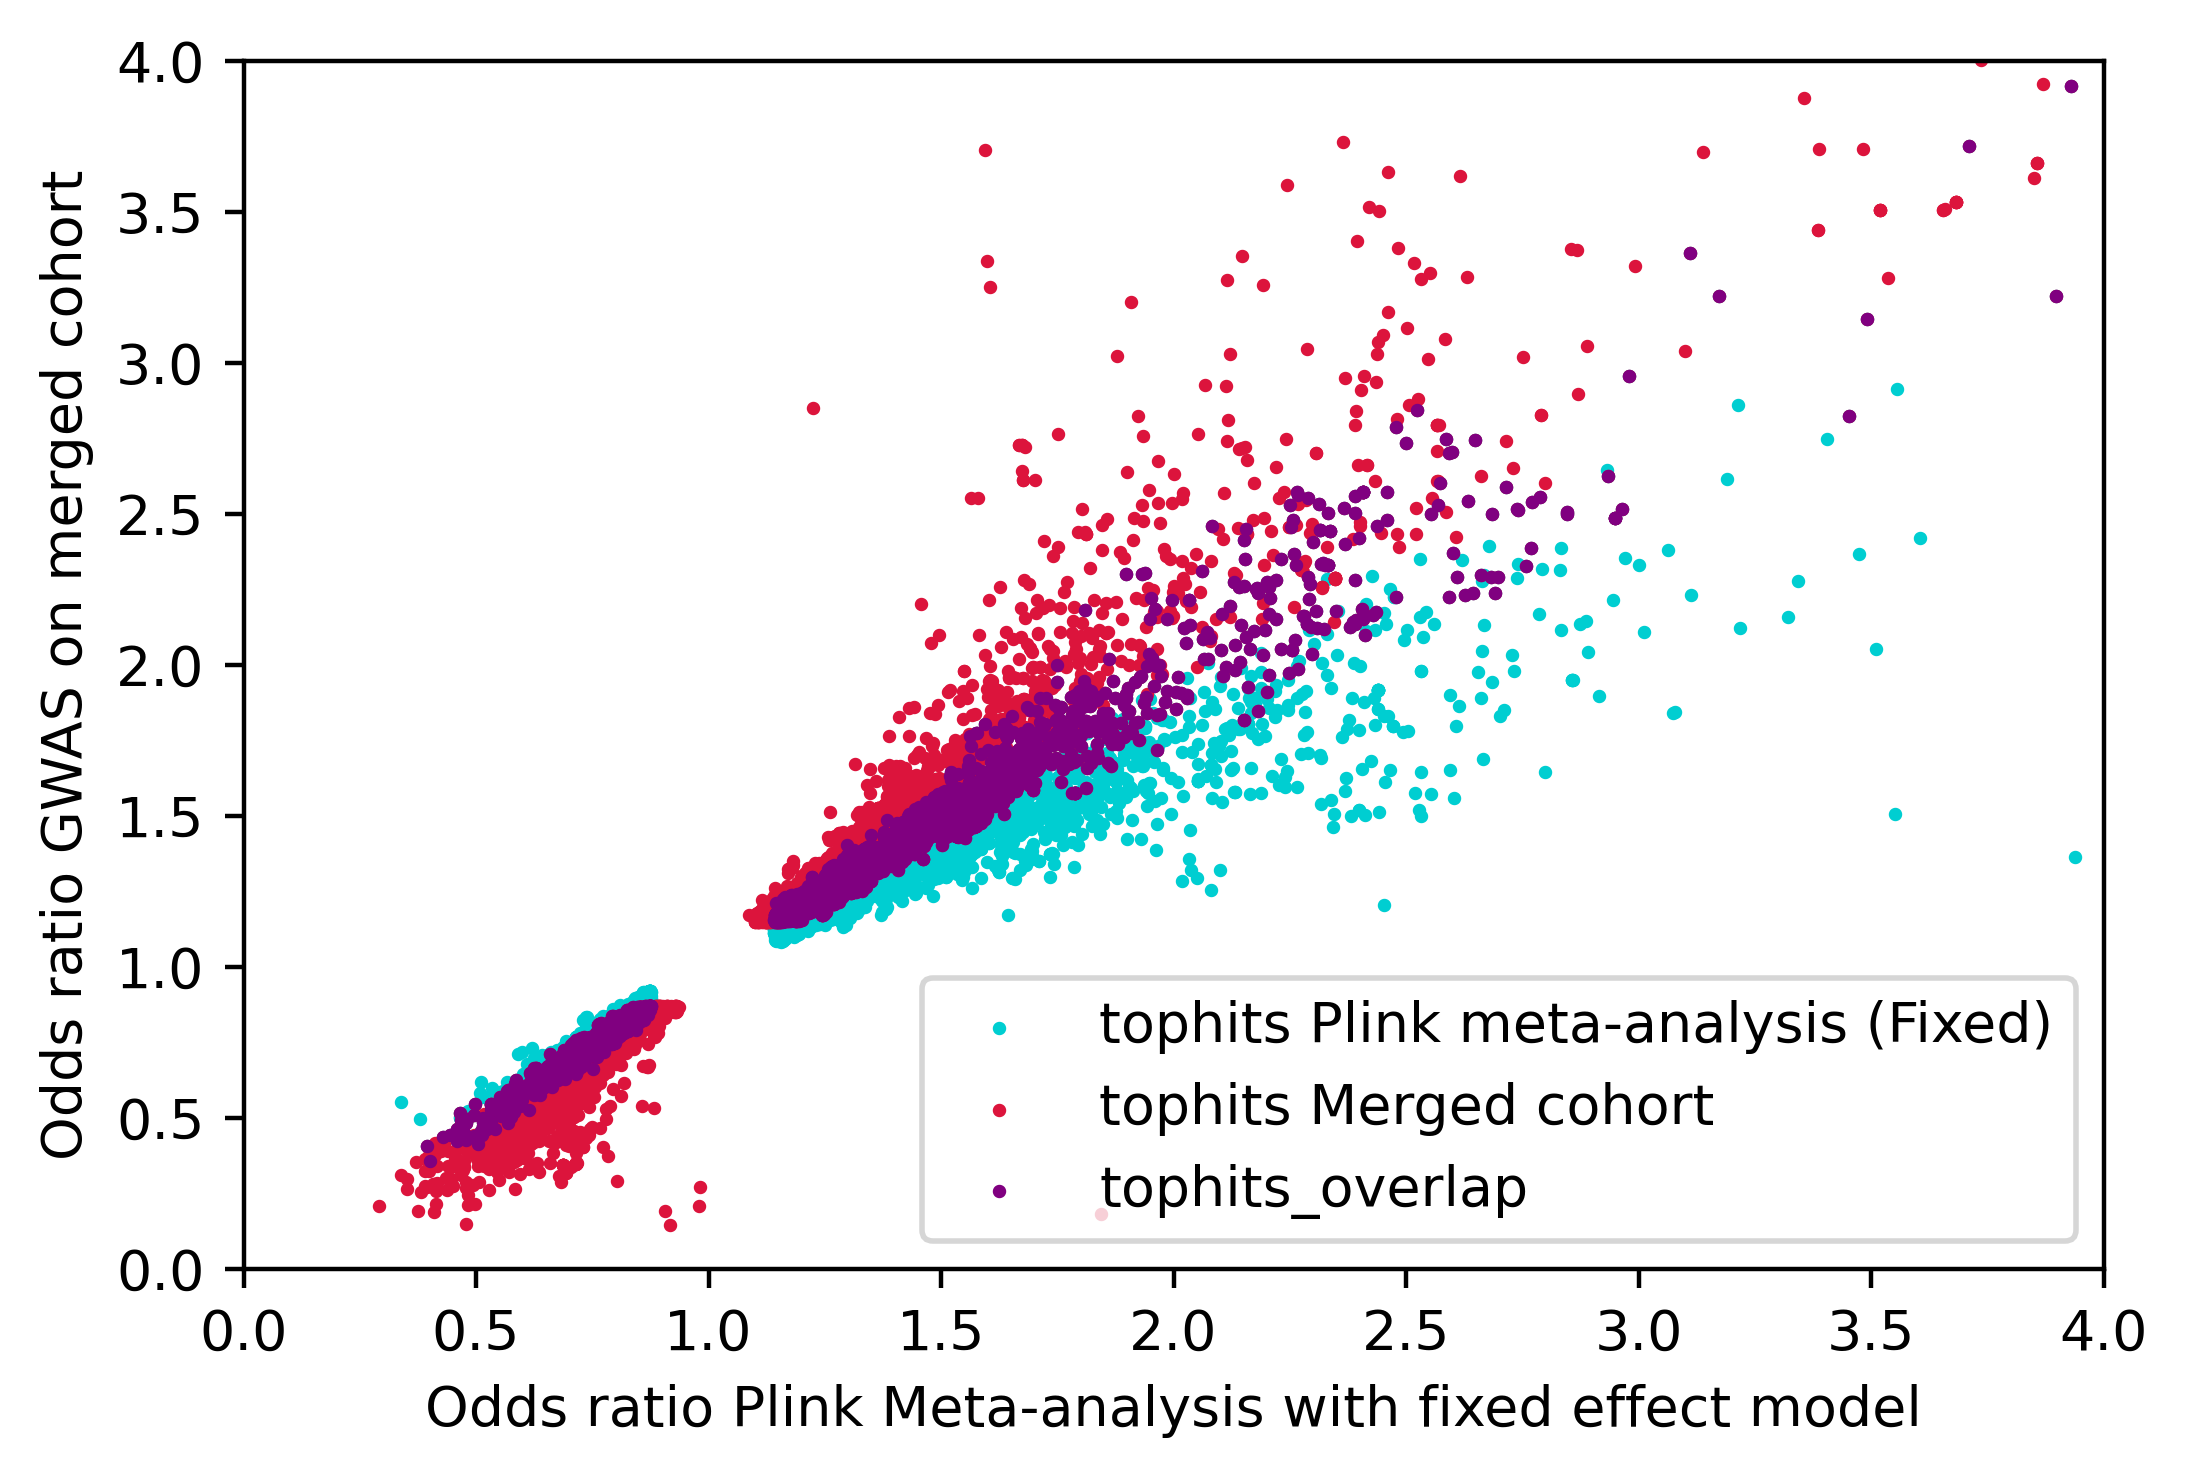

In [65]:
#SCATTER PLOT Odds ratio
# 14 cohorts
# plink meta analysis result on fixed effect model, top 10k snps of each, common snp 4475 
plt.figure(dpi=400)
plt.xlabel('Odds ratio Plink Meta-analysis with fixed effect model')
plt.ylabel('Odds ratio GWAS on merged cohort')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])

colors1 = '#00CED1'
colors2 = '#DC143C'
colors3 = 'Purple'
plt.xlim([0,4])
plt.ylim([0,4])
plt.scatter(tophits_latest_meta['OR_latest_meta'],tophits_latest_meta['OR_Samantha'],c=colors1,label='tophits Plink meta-analysis (Fixed)',s=2)
plt.scatter(tophits_Samantha['OR_latest_meta'],tophits_Samantha['OR_Samantha'],c=colors2,label='tophits Merged cohort',s=2)
plt.scatter(common_snp['OR_latest_meta_x'],common_snp['OR_Samantha_y'],c=colors3,label='tophits_overlap',s=2)

# plt.scatter(,c=colors2,label='Samantha\'s GWAS')

plt.legend()
plt.show()
#Low stability

In [82]:
#take top 1000 hits
top1k_plink_meta_fixed = plink_meta.sort_values(['P'])[:1000].reset_index() #fixed effect model
top1k_plink_meta_random = plink_meta.sort_values(['P(R)'])[:1000].reset_index() #random effect model

In [83]:
top1k_plink_meta_fixed

,index,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I
0,1470567,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89
1,1470430,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20
2,1470636,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21
3,7594852,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00
4,1470559,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7226944,14,88037696,14:88037696:T,T,?,11,2.120000e-04,2.120000e-04,1.5440,1.5440,0.8671,0.00
996,6769316,13,40447519,13:40447519:C,C,?,9,2.121000e-04,2.121000e-04,2.5996,2.5996,0.5752,0.00
997,5158274,9,29341748,9:29341748:A,A,?,11,2.125000e-04,2.125000e-04,1.5684,1.5684,0.6484,0.00
998,5158268,9,29339251,9:29339251:T,T,?,11,2.125000e-04,2.125000e-04,1.5684,1.5684,0.6484,0.00


In [84]:
top1k_plink_meta_random

,index,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I
0,7594852,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00
1,6912065,13,86311267,13:86311267:G,G,?,12,1.296000e-06,1.296000e-06,1.7065,1.7065,0.7991,0.00
2,4813039,8,74435989,8:74435989:C,C,?,12,1.454000e-06,1.454000e-06,1.4249,1.4249,0.6245,0.00
3,3990377,6,156289111,6:156289111:A,A,?,12,2.697000e-06,2.697000e-06,0.8102,0.8102,0.9781,0.00
4,4023503,6,166310711,6:166310711:A,A,?,13,3.160000e-06,3.160000e-06,0.7985,0.7985,0.6841,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5220793,9,80945361,9:80945361:T,T,?,12,2.606000e-04,2.950000e-04,1.3812,1.3882,0.4275,1.69
996,7700371,16,61528228,16:61528228:T,T,?,12,2.950000e-04,2.950000e-04,1.1797,1.1797,0.9702,0.00
997,5989742,11,39924543,11:39924543:A,A,?,12,2.954000e-04,2.954000e-04,1.2050,1.2050,0.4912,0.00
998,5000911,8,135477286,8:135477286:T,T,?,7,2.964000e-04,2.964000e-04,3.0144,3.0144,0.7626,0.00


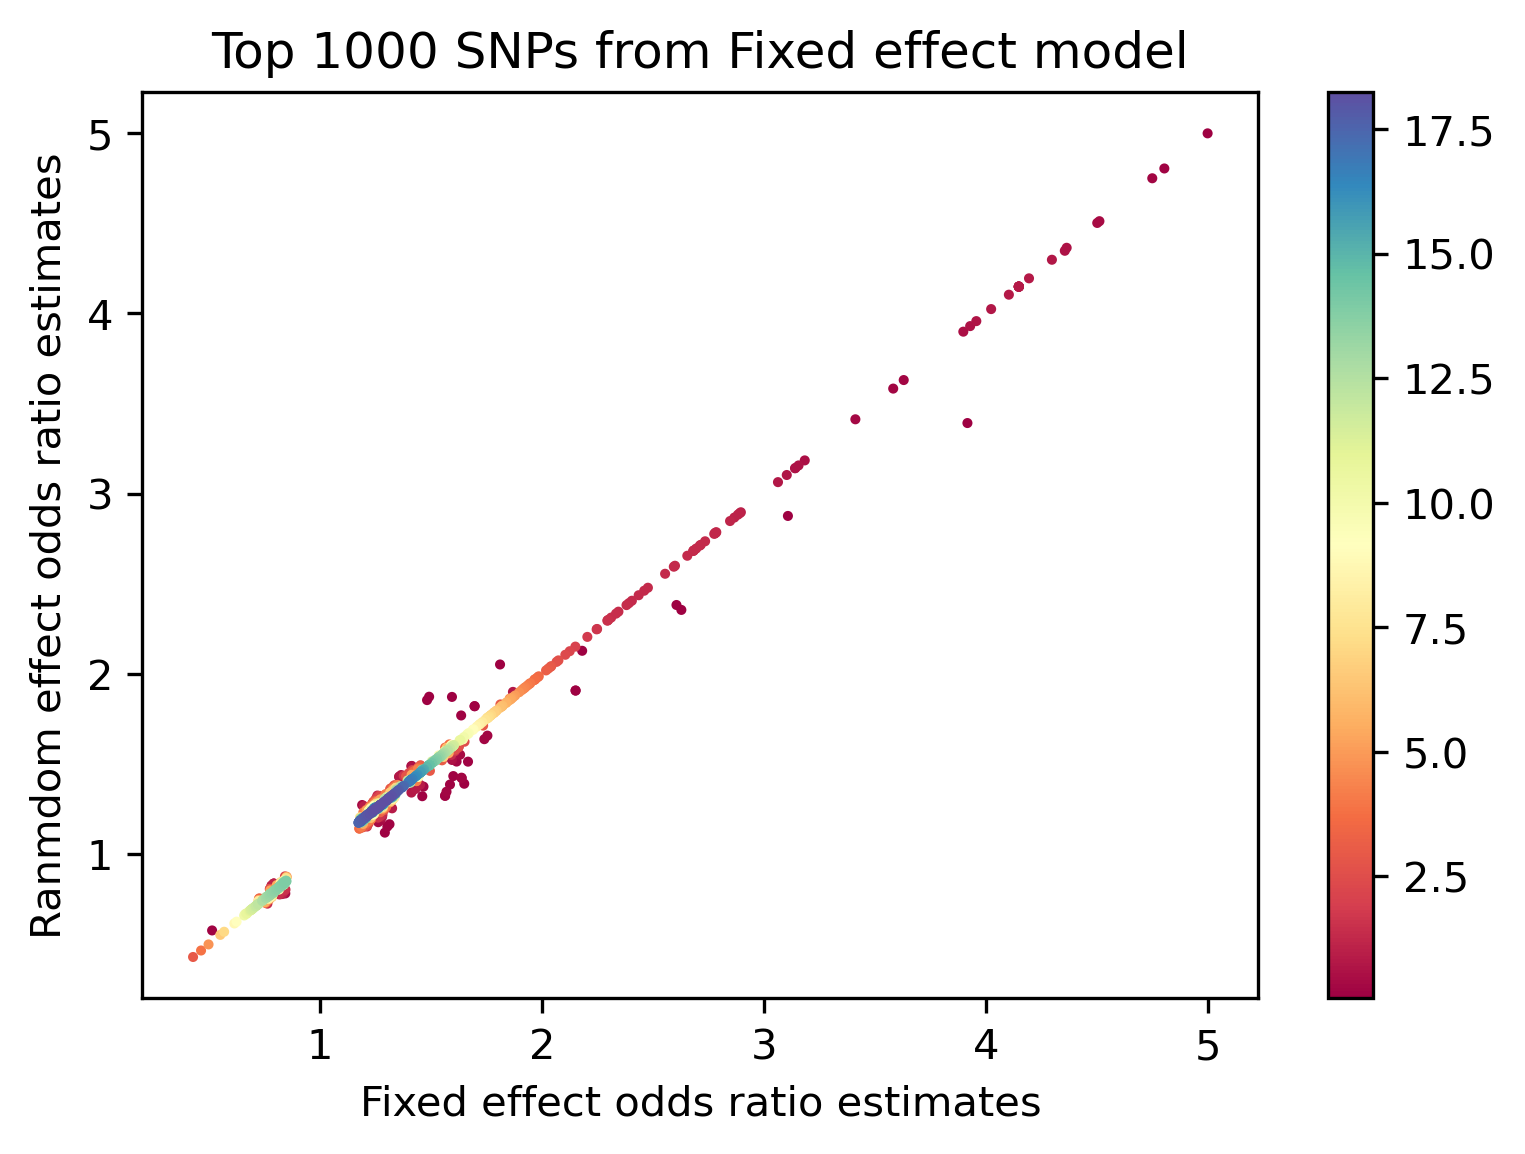

In [85]:
# Calculate the point density for effect sizes
# Compare overall OR of fixed vs random effect models for all snps
# fig, ax = plt.subplots()
plt.figure(dpi=300)
plt.title('Top 1000 SNPs from Fixed effect model',fontsize=12)

plt.xlabel('Fixed effect odds ratio estimates')
plt.ylabel('Ranmdom effect odds ratio estimates')

x = top1k_plink_meta_fixed['OR']
y = top1k_plink_meta_fixed['OR(R)']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
# plt.xlim([0.8,1.2])
# plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

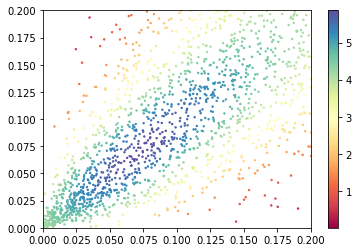

In [11]:
# Calculate the point density
# METAL
x = Merged['P-value'][:10000]
y = Merged['P'][:10000]


xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
plt.xlim([0,0.2])
plt.ylim([0,0.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')
plt.colorbar()
plt.show()

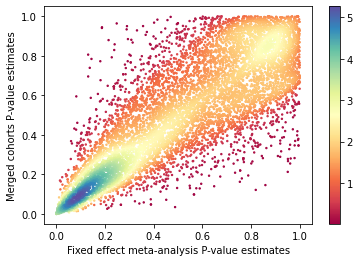

In [98]:
# Calculate the point density
# Plink meta vs Samantha
fig, ax = plt.subplots()
plt.xlabel('Fixed effect meta-analysis P-value estimates')
plt.ylabel('Merged cohorts P-value estimates')
x = Merged['P_latest_meta'][:10000]
y = Merged['P_Samantha'][:10000]


xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


# plt.xlim([0,0.2])
# plt.ylim([0,0.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')
plt.colorbar()
plt.show()

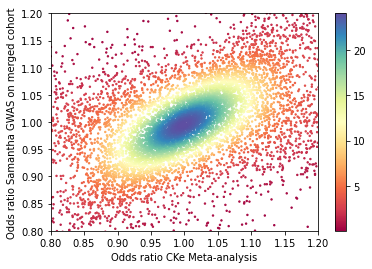

In [44]:
# Calculate the point density
# for effect sizes
# fig, ax = plt.subplots()
# plt.figure(dpi=400)
plt.xlabel('Odds ratio CKe Meta-analysis')
plt.ylabel('Odds ratio Samantha GWAS on merged cohort')

x = Merged['OR_latest_meta'][:10000]
y = Merged['OR_Samantha'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

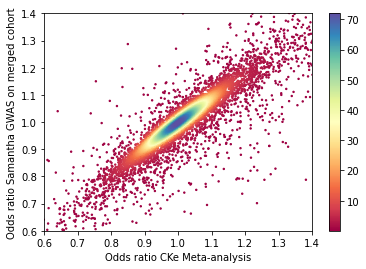

In [8]:
# redo on 10 cohorts, no MAF filter, fixed PCs, new A1 scheme, fixed fam files
# Calculate the point density
# for effect sizes
# fig, ax = plt.subplots()
# plt.figure(dpi=400)
plt.xlabel('Odds ratio CKe Meta-analysis')
plt.ylabel('Odds ratio Samantha GWAS on merged cohort')

x = Merged['OR_latest_meta'][:10000]
y = Merged['OR_Samantha'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.6,1.4])
# plt.xlim([0,4])
plt.ylim([0.6,1.4])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

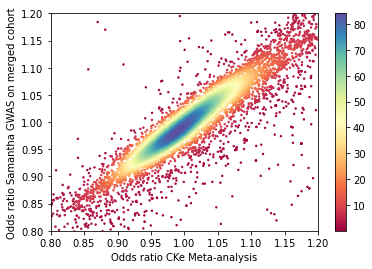

In [99]:
# 10 cohorts, no MAF filter, fixed PCs, new A1 scheme, fixed fam files, Plink meta-analysis
# Calculate the point density
# for effect sizes
# fig, ax = plt.subplots()
# plt.figure(dpi=400)
plt.xlabel('Odds ratio CKe Meta-analysis')
plt.ylabel('Odds ratio Samantha GWAS on merged cohort')

x = Merged['OR_latest_meta'][:10000]
y = Merged['OR_Samantha'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

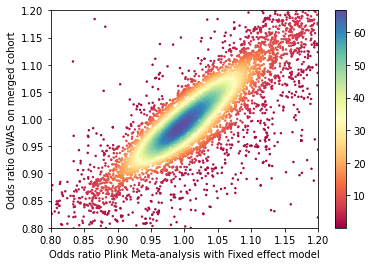

In [87]:
# 14 cohorts, no MAF filter, fixed PCs, new A1 scheme, fixed fam files, Plink meta-analysis
# Calculate the point density
# for effect sizes
# fig, ax = plt.subplots()
# plt.figure(dpi=400)
plt.xlabel('Odds ratio Plink Meta-analysis with Fixed effect model')
plt.ylabel('Odds ratio GWAS on merged cohort')

x = Merged['OR_latest_meta'][:10000]
y = Merged['OR_Samantha'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

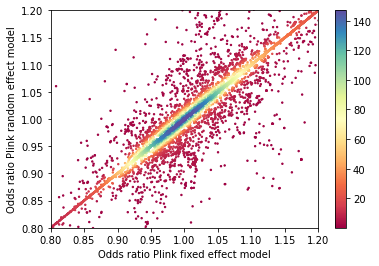

In [107]:
# 10 cohorts, no MAF filter, fixed PCs, new A1 scheme, fixed fam files, Plink meta-analysis, fixed vs Random
# Calculate the point density
# for effect sizes
# fig, ax = plt.subplots()
# plt.figure(dpi=400)
plt.xlabel('Odds ratio Plink fixed effect model')
plt.ylabel('Odds ratio Plink random effect model')

x = Merged['OR_latest_meta'][:10000]
y = Merged['OR(R)'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

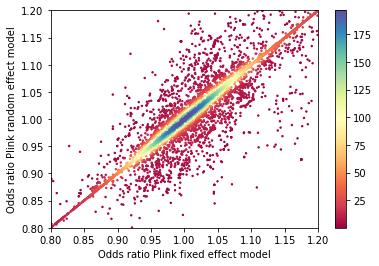

In [95]:
# 14 cohorts, no MAF filter, fixed PCs, new A1 scheme, fixed fam files, Plink meta-analysis, fixed vs Random
# Calculate the point density
# for effect sizes
# fig, ax = plt.subplots()
# plt.figure(dpi=400)
plt.xlabel('Odds ratio Plink fixed effect model')
plt.ylabel('Odds ratio Plink random effect model')

x = Merged['OR_latest_meta'][:10000]
y = Merged['OR(R)'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

In [24]:
def checkcohorts(a):
    count = 0
    for i in a:
        if i == '?':
            count+=1
    return 10-count

In [14]:
# list_temp = Merged[Merged['OR_Samantha']>1.18][Merged['OR_latest_meta']<0.83]
Merged['count_cohort'] = Merged['Direction'].map(checkcohorts)
# Merged.sort_values("count_cohort")
Merged_allSupport = Merged[Merged['count_cohort']==10].reset_index(drop=True)

In [15]:
Merged_allSupport

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_latest_meta,Direction,CHR,SNP,...,A1,TEST,NMISS,OR_Samantha,SE,L95,U95,STAT,P,count_cohort
0,1:62947229:C,NaN,NaN,-0.0333,0.1212,0.783600,0.967248,-++--+-+++,1,1:62947229:C,...,C,ADD,4316,0.9138,0.11510,0.7292,1.145,-0.78370,0.433200,10
1,2:80640397:G,NaN,NaN,-0.0013,0.1036,0.990300,0.998701,----+++---,2,2:80640397:G,...,G,ADD,4250,1.0020,0.09874,0.8258,1.216,0.02136,0.983000,10
2,9:83411606:A,NaN,NaN,0.0810,0.1583,0.609000,1.084371,+-++++--+-,9,9:83411606:A,...,A,ADD,4337,1.0950,0.15140,0.8143,1.474,0.60240,0.546900,10
3,2:208606083:G,NaN,NaN,0.0110,0.0476,0.817700,1.011061,+-+-++-++-,2,2:208606083:G,...,G,ADD,4224,1.0340,0.04562,0.9456,1.131,0.73480,0.462500,10
4,10:123393806:T,NaN,NaN,0.0350,0.0642,0.585500,1.035620,+-+++---+-,10,10:123393806:T,...,T,ADD,4134,1.0210,0.06105,0.9055,1.150,0.33310,0.739000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253318,6:39236055:G,NaN,NaN,0.1128,0.1256,0.369100,1.119408,+-+-++---+,6,6:39236055:G,...,G,ADD,4329,1.0440,0.12060,0.8245,1.323,0.35900,0.719600,10
3253319,16:62295269:T,NaN,NaN,0.0326,0.0640,0.610600,1.033137,+-+++-++++,16,16:62295269:T,...,T,ADD,4332,1.0090,0.06156,0.8942,1.138,0.14360,0.885800,10
3253320,2:233111433:A,NaN,NaN,0.0300,0.0641,0.639500,1.030455,-+--++++--,2,2:233111433:A,...,A,ADD,4297,1.0470,0.06147,0.9282,1.181,0.74790,0.454500,10
3253321,18:39747300:G,NaN,NaN,-0.1705,0.0601,0.004564,0.843243,----+-+---,18,18:39747300:G,...,G,ADD,4326,0.8565,0.05767,0.7649,0.959,-2.68700,0.007218,10


In [98]:
tophits_latest_meta_allsup = Merged_allSupport.sort_values(['P-value'])[:10000]
pd.merge(tophits_latest_meta_allsup,tophits_Samantha,how='inner',left_on="MarkerName",right_on='SNP')

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_latest_meta,Direction,cohort_support,CHR_x,...,BP_y,A1_y,TEST_y,NMISS_y,OR,SE_y,L95_y,U95_y,STAT_y,P_y
0,2:48242946:T,NaN,NaN,0.3234,0.0686,0.000002,1.381818,+++++++-++,0,2,...,48242946,T,ADD,4312,1.2470,0.06559,1.0970,1.4180,3.370,0.000753
1,2:48322467:G,NaN,NaN,0.2971,0.0641,0.000004,1.345950,+++++++-++,0,2,...,48322467,G,ADD,4332,1.2550,0.06126,1.1130,1.4150,3.704,0.000212
2,2:48322604:G,NaN,NaN,0.2958,0.0642,0.000004,1.344201,+++++++-++,0,2,...,48322604,G,ADD,4334,1.2610,0.06133,1.1180,1.4220,3.776,0.000159
3,7:63817488:A,NaN,NaN,0.2302,0.0514,0.000008,1.258852,+-+++++++-,0,7,...,63817488,A,ADD,4297,1.1960,0.04923,1.0860,1.3170,3.634,0.000279
4,7:63814749:A,NaN,NaN,0.2271,0.0513,0.000010,1.254955,+-+++++++-,0,7,...,63814749,A,ADD,4311,1.1890,0.04917,1.0800,1.3090,3.521,0.000429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5:108264315:G,NaN,NaN,-0.1642,0.0552,0.002959,0.848572,--+--+-++-,0,5,...,108264315,G,ADD,4336,0.8291,0.05295,0.7474,0.9198,-3.539,0.000401
343,3:30066965:T,NaN,NaN,0.1420,0.0478,0.002989,1.152577,+-+-++++++,0,3,...,30066965,T,ADD,4325,1.1640,0.04589,1.0640,1.2740,3.314,0.000919
344,10:8707813:T,NaN,NaN,0.1666,0.0561,0.002998,1.181282,+-+-+++-++,0,10,...,8707813,T,ADD,4328,1.2080,0.05396,1.0870,1.3430,3.504,0.000458
345,1:24957527:C,NaN,NaN,0.4575,0.1542,0.003001,1.580119,+-+-+++---,0,1,...,24957527,C,ADD,4334,1.6310,0.14390,1.2300,2.1620,3.397,0.000680


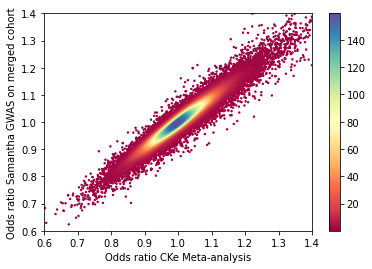

In [16]:
#with only snps have all cohorts supported
# redo on 10 cohorts, no MAF filter, fixed PCs, new A1 scheme
# Calculate the point density
# for effect sizes
plt.xlabel('Odds ratio CKe Meta-analysis')
plt.ylabel('Odds ratio Samantha GWAS on merged cohort')

x = Merged_allSupport['OR_latest_meta'][:50000]
y = Merged_allSupport['OR_Samantha'][:50000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.6,1.4])
# plt.xlim([0,4])
plt.ylim([0.6,1.4])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

In [45]:
from scipy.stats import pearsonr
corr, pval = pearsonr(Merged['OR_latest_meta'], np.nan_to_num(Merged['OR_Samantha']))
print("Pearsons correlation: %.3f, Pvalue: %.4f" % (corr, pval) )

Pearsons correlation: -0.002, Pvalue: 0.0000


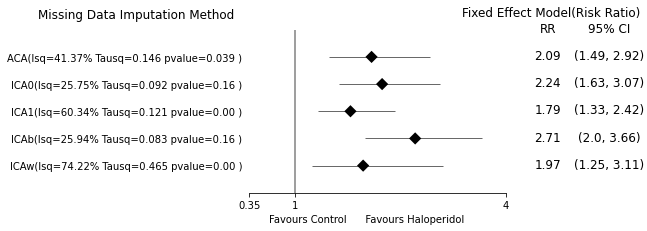

In [59]:
#forest plot example
import matplotlib.image as mpimg
import zepid
from zepid.graphics import EffectMeasurePlot

labs = ["ACA(Isq=41.37% Tausq=0.146 pvalue=0.039 )",
        "ICA0(Isq=25.75% Tausq=0.092 pvalue=0.16 )",
        "ICA1(Isq=60.34% Tausq=0.121 pvalue=0.00 )",
        "ICAb(Isq=25.94% Tausq=0.083 pvalue=0.16 )",
        "ICAw(Isq=74.22% Tausq=0.465 pvalue=0.00 )"]
measure = [2.09,2.24,1.79,2.71,1.97]
lower = [1.49,1.63,1.33,2.00,1.25]
upper = [2.92,3.07,2.42,3.66,3.11]
p = EffectMeasurePlot(label=labs, effect_measure=measure, lcl=lower, ucl=upper)
p.labels(effectmeasure='RR')
p.colors(pointshape="D")
ax=p.plot(figsize=(7,3), t_adjuster=0.09, max_value=4, min_value=0.35 )
plt.title("Fixed Effect Model(Risk Ratio)",loc="right",x=1, y=1.045)
plt.suptitle("Missing Data Imputation Method",x=-0.1,y=0.98)
ax.set_xlabel("Favours Control      Favours Haloperidol       ", fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.savefig("Missing Data Imputation Method",bbox_inches='tight')

In [26]:
#check fam phenos and support NMISS
loc_list = []
for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        if file.endswith('noNA_noMAFfilter_meta.txt'):
            loc = os.path.join(root, file)
            loc_list.append(loc)

In [41]:
#remove run only once, don't remove at final meta
# loc_list.remove('/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/Manchester_noNA_noMAFfilter_meta.txt')
# loc_list.remove('/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/Tacera_noNA_noMAFfilter_meta.txt')

In [27]:
loc_list

['/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/ACPA_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PEAC_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/Manchester_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/Leeds_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/SERA_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/EIRA_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/EAC_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/EARTH_B_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/RAMS_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/Madrid_noNA_noMAFfilter_meta.txt',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/EARTH_A_no

In [43]:
#generate file recording NMISS count
merge_temp = pd.DataFrame(columns=['SNP','NMISS'])
cols_to_keep = ['SNP','NMISS']
for i in range(len(loc_list)):
    cohort = pd.read_csv(loc_list[i],sep='\t')
#     cohort_name = os.path.split(loc_list[i])[1].split("_")[0]
    merge_temp = pd.merge(merge_temp,cohort,how='outer',left_on='SNP',right_on='SNP') #,suffixes=('',"_"+cohort1_name)
    merge_temp['NMISS_x'].fillna(0,inplace=True)
    merge_temp['NMISS_y'].fillna(0,inplace=True)
    merge_temp['NMISS'] = merge_temp['NMISS_x'] + merge_temp['NMISS_y'] #calculate phenotypes for each snp
    #print(merge_temp.columns)
    merge_temp = merge_temp.loc[:,cols_to_keep]
    print("openning ",loc_list[i],"cols to keep: ",cols_to_keep)
    merge_temp.to_csv("/exports/reum/CKe/compareNMISS_10cohort.txt",sep='\t')

openning  /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/ACPA_noNA_noMAFfilter_meta.txt cols to keep:  ['SNP', 'NMISS']
openning  /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PEAC_noNA_noMAFfilter_meta.txt cols to keep:  ['SNP', 'NMISS']
openning  /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/SERA_noNA_noMAFfilter_meta.txt cols to keep:  ['SNP', 'NMISS']
openning  /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/EIRA_noNA_noMAFfilter_meta.txt cols to keep:  ['SNP', 'NMISS']
openning  /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/EAC_noNA_noMAFfilter_meta.txt cols to keep:  ['SNP', 'NMISS']
openning  /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/EARTH_B_noNA_noMAFfilter_meta.txt cols to keep:  ['SNP', 'NMISS']
openning  /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/RAMS_noNA_noMAFfilter_meta.txt cols to keep:  ['SNP', 'NMISS']
openning  /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/Madrid_noNA_noMAFfilt

In [25]:
merge_temp = pd.read_csv("/exports/reum/CKe/compareNMISS_Allcohort.txt",sep='\t',index_col=0)
# merge_temp_10cohort = pd.read_csv("/exports/reum/CKe/compareNMISS_10cohort.txt",sep='\t',index_col=0)

/home/cke/.conda/envs/CKe/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [62]:
merge_temp

,SNP,NMISS
0,1:693731:G,4266.0
1,1:721290:C,4467.0
2,1:729632:T,4587.0
3,1:729679:C,4093.0
4,1:730087:C,4435.0
...,...,...
16043580,22:51230184:C,222.0
16043581,22:51230742:C,222.0
16043582,22:51234163:A,222.0
16043583,22:51234199:C,222.0


In [111]:
merge_temp_10cohort

,SNP,NMISS
0,1:693731:G,3815.0
1,1:721290:C,3973.0
2,1:729632:T,4095.0
3,1:729679:C,3151.0
4,1:730087:C,4040.0
...,...,...
12170071,22:51147177:C,349.0
12170072,22:51150382:A,349.0
12170073,22:51158392:G,349.0
12170074,22:51212346:A,349.0


In [63]:
plink_meta_withNMISS = pd.merge(plink_meta_Leedsfixed,merge_temp,left_on=['SNP'],right_on=['SNP'],how='left')
plink_meta_withNMISS

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I,NMISS
0,1,693731,1:693731:G,G,?,11,0.62190,0.62190,1.0398,1.0398,0.7531,0.00,4266.0
1,1,705882,1:705882:A,A,?,5,0.39180,0.39180,1.4027,1.4027,0.5642,0.00,3231.0
2,1,706368,1:706368:G,G,?,5,0.57840,0.67950,1.1170,1.1319,0.2470,26.18,572.0
3,1,713977,1:713977:T,T,?,3,0.03283,0.03283,3.8098,3.8098,0.7492,0.00,2893.0
4,1,714439,1:714439:A,A,?,4,0.06788,0.06788,3.2967,3.2967,0.8314,0.00,3111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8913171,22,51226692,22:51226692:A,A,?,2,0.44680,0.44680,1.7068,1.7068,0.5401,0.00,336.0
8913172,22,51229805,22:51229805:C,C,?,13,0.92950,0.92950,1.0077,1.0077,0.8599,0.00,4958.0
8913173,22,51232488,22:51232488:G,G,?,8,0.48810,0.48810,1.1980,1.1980,0.4454,0.00,3973.0
8913174,22,51237063,22:51237063:C,C,?,13,0.27680,0.27680,0.9360,0.9360,0.5234,0.00,3667.0


In [29]:
#Get top 100 hits for MTX test
plink_top100 = plink_meta_withNMISS[plink_meta_withNMISS['NMISS']>4000].sort_values("P")[:100]
plink_top100

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I,NMISS
1469951,2,179448911,2:179448911:A,A,?,13,2.362000e-08,6.021000e-05,1.3347,1.3314,0.1774,26.43,5619.0
1469814,2,179381715,2:179381715:C,C,?,13,1.012000e-07,1.735000e-04,1.3336,1.3322,0.1602,28.25,5587.0
7591807,16,11223454,16:11223454:C,C,?,13,1.134000e-07,1.134000e-07,1.2592,1.2592,0.4695,0.00,5570.0
1470020,2,179490478,2:179490478:C,C,?,12,2.243000e-07,9.359000e-04,1.3156,1.2892,0.1470,30.57,5387.0
1469943,2,179444939,2:179444939:T,T,?,13,3.160000e-07,2.688000e-04,1.3258,1.3123,0.1816,26.00,5622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946675,2,4123862,2:4123862:T,T,?,12,2.433000e-05,3.220000e-05,1.2625,1.2668,0.4279,1.65,5326.0
1470760,2,179753954,2:179753954:T,T,?,13,2.480000e-05,7.941000e-04,1.4385,1.4677,0.2135,22.76,5611.0
4639308,8,18615706,8:18615706:T,T,?,12,2.487000e-05,1.173000e-01,1.2753,1.2031,0.0024,61.82,5204.0
3294558,5,119175291,5:119175291:G,G,?,12,2.503000e-05,2.877000e-02,1.4770,1.3891,0.0836,38.60,5397.0


In [30]:
plink_top100['CHRBP']=plink_top100['SNP'].str.split(":",expand=True)[0]+":"+plink_top100['SNP'].str.split(":",expand=True)[1]

In [32]:
plink_top100

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I,NMISS,CHRBP
1469951,2,179448911,2:179448911:A,A,?,13,2.362000e-08,6.021000e-05,1.3347,1.3314,0.1774,26.43,5619.0,2:179448911
1469814,2,179381715,2:179381715:C,C,?,13,1.012000e-07,1.735000e-04,1.3336,1.3322,0.1602,28.25,5587.0,2:179381715
7591807,16,11223454,16:11223454:C,C,?,13,1.134000e-07,1.134000e-07,1.2592,1.2592,0.4695,0.00,5570.0,16:11223454
1470020,2,179490478,2:179490478:C,C,?,12,2.243000e-07,9.359000e-04,1.3156,1.2892,0.1470,30.57,5387.0,2:179490478
1469943,2,179444939,2:179444939:T,T,?,13,3.160000e-07,2.688000e-04,1.3258,1.3123,0.1816,26.00,5622.0,2:179444939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946675,2,4123862,2:4123862:T,T,?,12,2.433000e-05,3.220000e-05,1.2625,1.2668,0.4279,1.65,5326.0,2:4123862
1470760,2,179753954,2:179753954:T,T,?,13,2.480000e-05,7.941000e-04,1.4385,1.4677,0.2135,22.76,5611.0,2:179753954
4639308,8,18615706,8:18615706:T,T,?,12,2.487000e-05,1.173000e-01,1.2753,1.2031,0.0024,61.82,5204.0,8:18615706
3294558,5,119175291,5:119175291:G,G,?,12,2.503000e-05,2.877000e-02,1.4770,1.3891,0.0836,38.60,5397.0,5:119175291


In [31]:
plink_top100['CHRBP'].to_csv("/exports/reum/CKe/Pipelinerun_withPC/MTXsubset/plinkmeta_top100_4ksup_chrbp.txt",sep='\t',index=False,header=False)

In [38]:
bim_glasgow = pd.read_csv(loc_list[0],sep='\t',header=None)

In [41]:
bim_glasgow['SNP'] = bim_glasgow[0].astype(str)+":"+bim_glasgow[3].astype(str)
merge_tophits = pd.merge(plink_top100,bim_glasgow,how='inner',left_on="CHRBP",right_on="SNP")

In [43]:
merge_tophits[1]

0     2:179448911:G:A
1     2:179381715:G:C
2     16:11223454:C:G
3     2:179490478:T:C
4     2:179444939:C:T
           ...       
95      2:4123862:G:T
96    2:179753954:A:T
97     8:18615706:T:C
98    5:119175291:T:G
99    12:29088512:A:T
Name: 1, Length: 100, dtype: object

In [45]:
loc_list = ["/exports/reum/CKe/Pipelinerun_withPC/Glasgow/mergedChr/Glasgow_merged.bim",
           "/exports/reum/CKe/Pipelinerun_withPC/SERA/mergedChr/sera_merged.bim",
           "/exports/reum/CKe/Pipelinerun_withPC/Vienna/mergedChr/vienna_merged.bim",
            "/exports/reum/CKe/Pipelinerun_withPC/RAMS/mergedChr/RAMS_merged.bim",
            "/exports/reum/CKe/Pipelinerun_withPC/Madrid/mergedChr/madrid_merged.bim",
            "/exports/reum/CKe/Pipelinerun_withPC/EARTH_A/mergedChr/EA127genotypes_merged.bim",
            "/exports/reum/CKe/Pipelinerun_withPC/EARTH_B/mergedChr/EARTH_setB_merged.bim"
           ]
for run in loc_list: 
    cohort_name = run.split("/")[-3]
    summary_origin = pd.read_csv(run,sep='\t',header=None)
    summary_origin['SNP'] = summary_origin[0].astype(str)+":"+summary_origin[3].astype(str)
    merge_tophits = pd.merge(plink_top100,summary_origin,how='inner',left_on="CHRBP",right_on="SNP")
    new_name = cohort_name+"_top100_4ksup_chrbpa1.txt"
    new_loc = os.path.join(os.path.split(run)[0],new_name)
    #merge_tophits[1].to_csv(new_loc,sep='\t',index=False,header=False)
    print(cohort_name+": ",len(merge_tophits[1]),"saved to: ",new_loc)

Glasgow:  100 saved to:  /exports/reum/CKe/Pipelinerun_withPC/Glasgow/mergedChr/Glasgow_top100_4ksup_chrbpa1.txt
SERA:  100 saved to:  /exports/reum/CKe/Pipelinerun_withPC/SERA/mergedChr/SERA_top100_4ksup_chrbpa1.txt
Vienna:  100 saved to:  /exports/reum/CKe/Pipelinerun_withPC/Vienna/mergedChr/Vienna_top100_4ksup_chrbpa1.txt
RAMS:  100 saved to:  /exports/reum/CKe/Pipelinerun_withPC/RAMS/mergedChr/RAMS_top100_4ksup_chrbpa1.txt
Madrid:  99 saved to:  /exports/reum/CKe/Pipelinerun_withPC/Madrid/mergedChr/Madrid_top100_4ksup_chrbpa1.txt
EARTH_A:  99 saved to:  /exports/reum/CKe/Pipelinerun_withPC/EARTH_A/mergedChr/EARTH_A_top100_4ksup_chrbpa1.txt
EARTH_B:  100 saved to:  /exports/reum/CKe/Pipelinerun_withPC/EARTH_B/mergedChr/EARTH_B_top100_4ksup_chrbpa1.txt


In [64]:
plink_meta_withNMISS_toFUMA = plink_meta_withNMISS.loc[:,['CHR','BP','A1','P','OR','NMISS']]
plink_meta_withNMISS_toFUMA

,CHR,BP,A1,P,OR,NMISS
0,1,693731,G,0.62190,1.0398,4266.0
1,1,705882,A,0.39180,1.4027,3231.0
2,1,706368,G,0.57840,1.1170,572.0
3,1,713977,T,0.03283,3.8098,2893.0
4,1,714439,A,0.06788,3.2967,3111.0
...,...,...,...,...,...,...
8913171,22,51226692,A,0.44680,1.7068,336.0
8913172,22,51229805,C,0.92950,1.0077,4958.0
8913173,22,51232488,G,0.48810,1.1980,3973.0
8913174,22,51237063,C,0.27680,0.9360,3667.0


In [67]:
summary_origin_withNMISS = pd.merge(summary_origin,merge_temp,left_on=['MarkerName'],right_on=['SNP'],how='left')
summary_origin_withNMISS

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction,SNP,NMISS
0,11:16274555:C,NaN,NaN,-0.0743,0.1649,0.6523,??????????-???,11:16274555:C,563.0
1,6:73947097:T,NaN,NaN,-0.0883,0.3232,0.7847,+?-+-??-?-???-,6:73947097:T,3780.0
2,1:62947229:C,NaN,NaN,-0.0570,0.1077,0.5967,-++--+-++++-?-,1:62947229:C,5371.0
3,1:216223194:T,NaN,NaN,0.0440,1.4180,0.9752,+?????????????,1:216223194:T,2074.0
4,1:164753374:G,NaN,NaN,0.2829,1.4160,0.8416,+?????????????,1:164753374:G,2074.0
...,...,...,...,...,...,...,...,...,...
16043673,8:62110862:C,NaN,NaN,0.0209,0.0520,0.6873,-++---++--+--+,8:62110862:C,5587.0
16043674,2:51581299:A,NaN,NaN,1.4757,1.6510,0.3714,????????????+?,2:51581299:A,222.0
16043675,8:50701824:T,NaN,NaN,1.0557,1.4260,0.4591,????+?????????,8:50701824:T,709.0
16043676,5:91184586:G,NaN,NaN,0.7237,1.6800,0.6666,??+???????????,5:91184586:G,102.0


In [68]:
summary_origin_withNMISS.to_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/METALresult_Allcohorts_toFUMA.TBL",sep=' ',index=False)

In [74]:
plink_meta_withNMISS.loc[:,['MarkerName','CHR','BP']].to_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_snploc_samplesize.txt",header=0,sep='\t',index=False)

In [75]:
plink_meta_withNMISS['NMISS'].isnull().any()

False

In [52]:
plink_meta_withNMISS = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC_toFUMA.txt",sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC_toFUMA.txt'

In [68]:
plink_meta_withNMISS['MarkerName'] = plink_meta_withNMISS['SNP'].str.split(":",expand=True)[0]+":"+plink_meta_withNMISS['SNP'].str.split(":",expand=True)[1]

In [69]:
plink_meta_withNMISS_toFUMA['BETA']=np.log(plink_meta_withNMISS['OR'])

/home/cke/.conda/envs/CKe/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
plink_meta_withNMISS_toFUMA['SE']=abs(np.log(plink_meta_withNMISS['OR'])/norm.ppf(plink_meta_withNMISS['P']/2)) 

In [71]:
plink_meta_withNMISS_toFUMA.fillna(0,inplace=True) #487 nas in SE col

In [72]:
plink_meta_withNMISS_toFUMA.to_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_Leedsfixed_toFUMA.txt",sep='\t',index=False)
# plink_meta_withNMISS.rename({'SNP':'CHRBPA1','MarkerName':'CHRBP'},axis=1).to_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC_toFUMA.txt",sep=' ',index=False)

In [67]:
plink_meta_withNMISS.loc[:,['MarkerName','CHR','BP']]

KeyError: "['MarkerName'] not in index"

In [39]:
plink_meta_withNMISS.to_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC_toMAGMA.txt",sep='\t',index=False)

In [89]:
#run only once, add NMISS info to Merged dataframe
Merged = pd.merge(Merged,merge_temp,left_on=['SNP'],right_on=['SNP'],how='inner',suffixes=("_merged","_NMISSdata"))
Merged

,CHR_latest_meta,BP_latest_meta,SNP,A1_latest_meta,A2,N,P_latest_meta,P(R),OR_latest_meta,OR(R),Q,I,CHR_Samantha,BP_Samantha,A1_Samantha,TEST,NMISS_merged,OR_Samantha,SE,L95,U95,STAT,P_Samantha,NMISS_NMISSdata
0,1,730087,1:730087:C,C,?,11,0.1674,0.4293,1.1813,1.1163,0.3683,7.94,1,730087,C,ADD,4040,1.2420,0.11870,0.9841,1.567,1.8250,0.06795,4445.0
1,1,753541,1:753541:A,A,?,11,0.7305,0.7305,1.0226,1.0226,0.7690,0.00,1,753541,A,ADD,4116,1.0250,0.06572,0.9009,1.166,0.3719,0.71000,5088.0
2,1,781845,1:781845:G,G,?,11,0.4911,0.4911,1.0547,1.0547,0.8987,0.00,1,781845,G,ADD,3945,1.0610,0.07727,0.9121,1.235,0.7689,0.44190,4328.0
3,1,782981,1:782981:T,T,?,11,0.7397,0.7397,1.0227,1.0227,0.9249,0.00,1,782981,T,ADD,3969,1.0170,0.06784,0.8904,1.162,0.2488,0.80350,4923.0
4,1,790465,1:790465:A,A,?,12,0.3281,0.3281,1.0810,1.0810,0.8944,0.00,1,790465,A,ADD,3895,1.0990,0.07943,0.9402,1.284,1.1840,0.23630,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663776,22,51221731,22:51221731:C,C,?,13,0.9330,0.9330,1.0073,1.0073,0.8073,0.00,22,51221731,C,ADD,4244,1.0510,0.09129,0.8792,1.257,0.5495,0.58260,4971.0
4663777,22,51222100,22:51222100:T,T,?,13,0.1321,0.1321,1.1523,1.1523,0.8997,0.00,22,51222100,T,ADD,4254,1.0950,0.09875,0.9020,1.328,0.9151,0.36010,4985.0
4663778,22,51223637,22:51223637:A,A,?,13,0.1349,0.1349,1.1518,1.1518,0.8854,0.00,22,51223637,A,ADD,4249,1.0990,0.09901,0.9052,1.334,0.9537,0.34030,4980.0
4663779,22,51229805,22:51229805:C,C,?,13,0.9207,0.9207,1.0087,1.0087,0.8707,0.00,22,51229805,C,ADD,4242,1.0470,0.09124,0.8756,1.252,0.5038,0.61440,4969.0


In [90]:
merged_nmiss4k = Merged[Merged['NMISS_NMISSdata']>4000]
merged_nmiss4k.reset_index(drop=True,inplace=True)
merged_nmiss4k

,CHR_latest_meta,BP_latest_meta,SNP,A1_latest_meta,A2,N,P_latest_meta,P(R),OR_latest_meta,OR(R),Q,I,CHR_Samantha,BP_Samantha,A1_Samantha,TEST,NMISS_merged,OR_Samantha,SE,L95,U95,STAT,P_Samantha,NMISS_NMISSdata
0,1,730087,1:730087:C,C,?,11,0.1674,0.4293,1.1813,1.1163,0.3683,7.94,1,730087,C,ADD,4040,1.242,0.11870,0.9841,1.567,1.82500,0.06795,4445.0
1,1,753541,1:753541:A,A,?,11,0.7305,0.7305,1.0226,1.0226,0.7690,0.00,1,753541,A,ADD,4116,1.025,0.06572,0.9009,1.166,0.37190,0.71000,5088.0
2,1,781845,1:781845:G,G,?,11,0.4911,0.4911,1.0547,1.0547,0.8987,0.00,1,781845,G,ADD,3945,1.061,0.07727,0.9121,1.235,0.76890,0.44190,4328.0
3,1,782981,1:782981:T,T,?,11,0.7397,0.7397,1.0227,1.0227,0.9249,0.00,1,782981,T,ADD,3969,1.017,0.06784,0.8904,1.162,0.24880,0.80350,4923.0
4,1,790465,1:790465:A,A,?,12,0.3281,0.3281,1.0810,1.0810,0.8944,0.00,1,790465,A,ADD,3895,1.099,0.07943,0.9402,1.284,1.18400,0.23630,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427220,22,51221190,22:51221190:A,A,?,10,0.9469,0.9469,1.0098,1.0098,0.6966,0.00,22,51221190,A,ADD,3956,0.990,0.15100,0.7365,1.331,-0.06648,0.94700,4328.0
4427221,22,51221731,22:51221731:C,C,?,13,0.9330,0.9330,1.0073,1.0073,0.8073,0.00,22,51221731,C,ADD,4244,1.051,0.09129,0.8792,1.257,0.54950,0.58260,4971.0
4427222,22,51222100,22:51222100:T,T,?,13,0.1321,0.1321,1.1523,1.1523,0.8997,0.00,22,51222100,T,ADD,4254,1.095,0.09875,0.9020,1.328,0.91510,0.36010,4985.0
4427223,22,51223637,22:51223637:A,A,?,13,0.1349,0.1349,1.1518,1.1518,0.8854,0.00,22,51223637,A,ADD,4249,1.099,0.09901,0.9052,1.334,0.95370,0.34030,4980.0


In [91]:
merged_nmiss5k = Merged[Merged['NMISS_NMISSdata']>5000]
merged_nmiss5k.reset_index(drop=True,inplace=True)
merged_nmiss5k

,CHR_latest_meta,BP_latest_meta,SNP,A1_latest_meta,A2,N,P_latest_meta,P(R),OR_latest_meta,OR(R),Q,I,CHR_Samantha,BP_Samantha,A1_Samantha,TEST,NMISS_merged,OR_Samantha,SE,L95,U95,STAT,P_Samantha,NMISS_NMISSdata
0,1,753541,1:753541:A,A,?,11,0.730500,0.7305,1.0226,1.0226,0.7690,0.00,1,753541,A,ADD,4116,1.025,0.06572,0.9009,1.166,0.3719,0.710000,5088.0
1,1,845635,1:845635:T,T,?,12,0.008806,0.1323,1.1543,1.1236,0.1748,27.49,1,845635,T,ADD,4287,1.144,0.05557,1.0260,1.275,2.4170,0.015660,5353.0
2,1,845938,1:845938:A,A,?,12,0.009337,0.1047,1.1506,1.1251,0.2176,22.99,1,845938,A,ADD,4284,1.147,0.05471,1.0300,1.277,2.5050,0.012250,5352.0
3,1,846078,1:846078:T,T,?,12,0.007501,0.1638,1.1615,1.1259,0.1055,35.60,1,846078,T,ADD,4317,1.149,0.05679,1.0280,1.284,2.4420,0.014620,5389.0
4,1,846398,1:846398:A,A,?,12,0.007109,0.1162,1.1589,1.1262,0.1923,25.63,1,846398,A,ADD,4271,1.162,0.05541,1.0420,1.295,2.7110,0.006709,5332.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284047,22,51196296,22:51196296:C,C,?,13,0.911900,0.9119,1.0093,1.0093,0.8830,0.00,22,51196296,C,ADD,4282,1.052,0.08778,0.8858,1.250,0.5785,0.562900,5015.0
3284048,22,51197576,22:51197576:C,C,?,13,0.949200,0.9492,1.0053,1.0053,0.8034,0.00,22,51197576,C,ADD,4280,1.038,0.08822,0.8735,1.234,0.4269,0.669400,5013.0
3284049,22,51197602,22:51197602:A,A,?,13,0.167900,0.1679,1.1416,1.1416,0.9398,0.00,22,51197602,A,ADD,4273,1.095,0.10080,0.8988,1.334,0.9016,0.367300,5005.0
3284050,22,51198906,22:51198906:A,A,?,13,0.952100,0.9521,1.0050,1.0050,0.8175,0.00,22,51198906,A,ADD,4280,1.046,0.08800,0.8801,1.243,0.5081,0.611400,5012.0


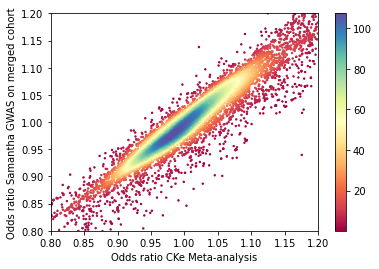

In [104]:
#with only snps have >4k samples supported
# redo on 10 cohorts, no MAF filter, fixed PCs, new A1 scheme
# Calculate the point density
# for effect sizes
plt.xlabel('Odds ratio CKe Meta-analysis')
plt.ylabel('Odds ratio Samantha GWAS on merged cohort')

x = merged_nmiss4k['OR_latest_meta'][:10000]
y = merged_nmiss4k['OR_Samantha'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

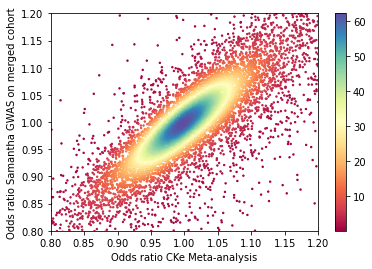

In [43]:
#with only snps have >4k samples supported
# redo on 14 cohorts, no MAF filter, fixed PCs, new A1 scheme, METAL
# Calculate the point density
# for effect sizes
plt.xlabel('Odds ratio CKe Meta-analysis')
plt.ylabel('Odds ratio Samantha GWAS on merged cohort')

x = merged_nmiss4k['OR_latest_meta'][:10000]
y = merged_nmiss4k['OR_Samantha'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

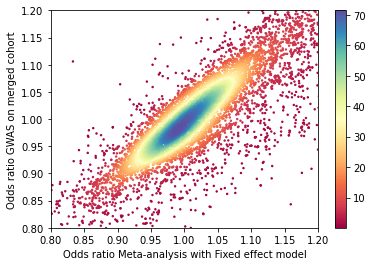

In [93]:
#with only snps have >4k samples supported
# redo on 14 cohorts, no MAF filter, fixed PCs, new A1 scheme, plink fixed effect model
# Calculate the point density
# for effect sizes
plt.xlabel('Odds ratio Meta-analysis with Fixed effect model')
plt.ylabel('Odds ratio GWAS on merged cohort')

x = merged_nmiss4k['OR_latest_meta'][:10000]
y = merged_nmiss4k['OR_Samantha'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

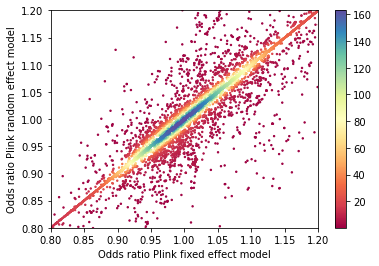

In [106]:
#with only snps have >4k samples supported, fixed vs random
# redo on 10 cohorts, no MAF filter, fixed PCs, new A1 scheme, plink meta, fixed vs random effect model
# Calculate the point density
# for effect sizes
plt.xlabel('Odds ratio Plink fixed effect model')
plt.ylabel('Odds ratio Plink random effect model')

x = merged_nmiss4k['OR_latest_meta'][:10000]
y = merged_nmiss4k['OR(R)'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

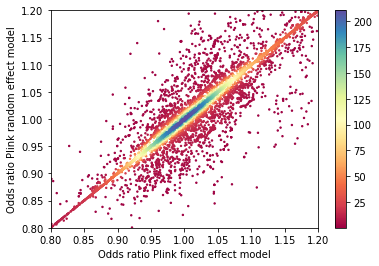

In [94]:
#with only snps have >4k samples supported, fixed vs random
# redo on 14 cohorts, no MAF filter, fixed PCs, new A1 scheme, plink meta, fixed vs random effect model
# Calculate the point density
# for effect sizes
plt.xlabel('Odds ratio Plink fixed effect model')
plt.ylabel('Odds ratio Plink random effect model')

x = merged_nmiss4k['OR_latest_meta'][:10000]
y = merged_nmiss4k['OR(R)'][:10000]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 
plt.xlim([0.8,1.2])
# plt.xlim([0,4])
plt.ylim([0.8,1.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

[Text(0, 0, '0%'),
 Text(1782631, 0, '10%'),
 Text(3565262, 0, '20%'),
 Text(5347892, 0, '30%'),
 Text(7130523, 0, '40%'),
 Text(8913154, 0, '50%'),
 Text(10695785, 0, '60%'),
 Text(12478415, 0, '70%'),
 Text(14261046, 0, '80%'),
 Text(16043677, 0, '90%')]

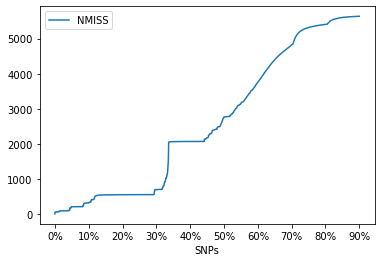

In [35]:
merge_temp.sort_values("NMISS",inplace=True)
c = merge_temp.plot(kind='line',x='SNP', y='NMISS',sort_columns=True,xlabel='SNPs')
percentile_pheno = np.percentile(merge_temp.index,np.linspace(0,100,10),interpolation='nearest')
c.set_xticks(percentile_pheno)
c.set_xticklabels([str(i*10)+'%' for i in range(10)])

[Text(0, 0, '0%'),
 Text(1352231, 0, '10%'),
 Text(2704461, 0, '20%'),
 Text(4056692, 0, '30%'),
 Text(5408922, 0, '40%'),
 Text(6761153, 0, '50%'),
 Text(8113383, 0, '60%'),
 Text(9465614, 0, '70%'),
 Text(10817844, 0, '80%'),
 Text(12170075, 0, '90%')]

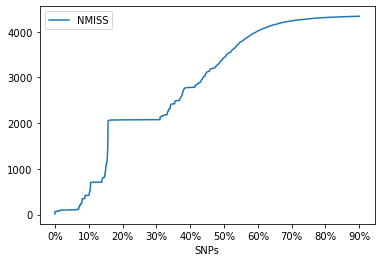

In [112]:
merge_temp_10cohort.sort_values("NMISS",inplace=True)
c = merge_temp_10cohort.plot(kind='line',x='SNP', y='NMISS',sort_columns=True,xlabel='SNPs')
percentile_pheno = np.percentile(merge_temp_10cohort.index,np.linspace(0,100,10),interpolation='nearest')
c.set_xticks(percentile_pheno)
c.set_xticklabels([str(i*10)+'%' for i in range(10)])

In [18]:
summary_replicate['cohort_support'] = summary_replicate['Direction'].map(checkcohorts)
suptoplot = summary_replicate.loc[:,['MarkerName','cohort_support']]#.iloc[:1000,:]
suptoplot.sort_values("cohort_support",inplace=True)

[Text(0, 0, '0%'),
 Text(1359133, 0, '10%'),
 Text(2718265, 0, '20%'),
 Text(4077398, 0, '30%'),
 Text(5436531, 0, '40%'),
 Text(6795663, 0, '50%'),
 Text(8154796, 0, '60%'),
 Text(9513929, 0, '70%'),
 Text(10873061, 0, '80%'),
 Text(12232194, 0, '90%')]

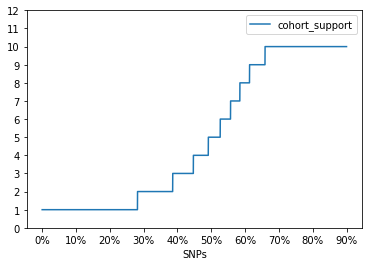

In [19]:
percentile = np.percentile(suptoplot.index,np.linspace(0,100,10),interpolation='nearest')
b = suptoplot.plot(kind="line",x='MarkerName', y='cohort_support',sort_columns=True,xlabel='SNPs')
b.set_xticks(percentile)
b.set_yticks(range(0,13))
b.set_xticklabels([str(i*10)+'%' for i in range(10)])

In [96]:
# METAL vs RANDOM/FIXED Plink plot, OR top 10k snps
Merged_tools = pd.merge(summary_origin,plink_meta,left_on=['MarkerName'],right_on=['SNP'],how='inner',suffixes=("_METAL","_Plink"))
Merged_tools

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_METAL,Direction,CHR,BP,SNP,A1,A2,N,P,P(R),OR_Plink,OR(R),Q,I
0,6:73947097:T,NaN,NaN,-0.0883,0.3232,0.78470,0.915486,+?-+-??-?-???-,6,73947097,6:73947097:T,T,?,7,0.78470,0.78470,0.9155,0.9155,0.7170,0.00
1,1:62947229:C,NaN,NaN,-0.0570,0.1077,0.59670,0.944594,-++--+-++++-?-,1,62947229,1:62947229:C,C,?,12,0.46310,0.95710,0.9191,0.9898,0.0671,41.11
2,12:108228190:C,NaN,NaN,0.0261,0.6092,0.96590,1.026444,++??-?????????,12,108228190,12:108228190:C,C,?,3,0.96590,0.92250,1.0264,1.0821,0.2072,36.48
3,3:88615500:A,NaN,NaN,-0.2470,0.5604,0.65940,0.781141,-???--????????,3,88615500,3:88615500:A,A,?,3,0.65940,0.65940,0.7811,0.7811,0.9792,0.00
4,8:79945230:A,NaN,NaN,0.9495,0.7175,0.18570,2.584417,+????+???-????,8,79945230,8:79945230:A,A,?,3,0.18570,0.18570,2.5845,2.5845,0.7572,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916607,2:233111433:A,NaN,NaN,0.0389,0.0562,0.48830,1.039667,-+--++++--++-+,2,233111433,2:233111433:A,A,?,13,0.50250,0.50250,1.0404,1.0404,0.7902,0.00
8916608,18:39747300:G,NaN,NaN,-0.0898,0.0528,0.08913,0.914114,----+-+---+-++,18,39747300,18:39747300:G,G,?,13,0.01219,0.07099,0.8692,0.8728,0.1984,24.27
8916609,7:43353264:T,NaN,NaN,1.0467,0.6315,0.09743,2.848236,+???+????+????,7,43353264,7:43353264:T,T,?,3,0.09743,0.09743,2.8484,2.8484,0.9338,0.00
8916610,8:62110862:C,NaN,NaN,0.0209,0.0520,0.68730,1.021120,-++---++--+--+,8,62110862,8:62110862:C,C,?,13,0.65510,0.75590,0.9759,0.9717,0.0433,44.23


In [97]:
#take top 10000 hits
tophits_tools_plink_fixed = Merged_tools.sort_values(['P'])[:10000].reset_index()#fixed effect model
tophits_tools_plink_random = Merged_tools.sort_values(['P(R)'])[:10000].reset_index() #fixed effect model
tophits_tools_METAL = Merged_tools.sort_values(['P-value'])[:10000].reset_index() # METAL

In [98]:
tophits_tools_plink_fixed

,index,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_METAL,Direction,CHR,BP,SNP,A1,A2,N,P,P(R),OR_Plink,OR(R),Q,I
0,289436,2:179448911:A,NaN,NaN,0.2709,0.0494,4.184000e-08,1.311144,++-+++-+-+++++,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89
1,2496969,2:179381715:C,NaN,NaN,0.2688,0.0517,1.966000e-07,1.308393,++-+++-+-+++++,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20
2,8710045,2:179490478:C,NaN,NaN,0.2615,0.0505,2.277000e-07,1.298877,++-+++-+-+++?+,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21
3,5536029,16:11223454:C,NaN,NaN,0.2195,0.0411,9.398000e-08,1.245454,++++++++++++++,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00
4,1103363,2:179444939:T,NaN,NaN,0.2724,0.0526,2.198000e-07,1.313112,++-+++-+-+++++,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8011540,13:81176568:G,NaN,NaN,-0.1341,0.0515,9.256000e-03,0.874503,-+---++-+-+-+-,13,81176568,13:81176568:G,G,?,13,1.832000e-03,1.832000e-03,0.8443,0.8443,0.6214,0.00
9996,3707230,7:82033439:T,NaN,NaN,0.3177,0.1019,1.832000e-03,1.373964,++-++++--+?-?+,7,82033439,7:82033439:T,T,?,12,1.832000e-03,4.676000e-03,1.3739,1.3835,0.3577,8.94
9997,7540983,3:157140765:A,NaN,NaN,0.2077,0.0651,1.407000e-03,1.230844,++++++++-++++-,3,157140765,3:157140765:A,A,?,13,1.832000e-03,1.085000e-02,1.2353,1.2347,0.3295,11.53
9998,6160300,6:70202089:T,NaN,NaN,0.2225,0.0760,3.405000e-03,1.249196,+++-+++--+--+-,6,70202089,6:70202089:T,T,?,13,1.832000e-03,4.845000e-02,1.2823,1.3007,0.0571,41.65


In [99]:
tophits_tools_METAL

,index,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,OR_METAL,Direction,CHR,BP,SNP,A1,A2,N,P,P(R),OR_Plink,OR(R),Q,I
0,289436,2:179448911:A,NaN,NaN,0.2709,0.0494,4.184000e-08,1.311144,++-+++-+-+++++,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89
1,5536029,16:11223454:C,NaN,NaN,0.2195,0.0411,9.398000e-08,1.245454,++++++++++++++,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00
2,2496969,2:179381715:C,NaN,NaN,0.2688,0.0517,1.966000e-07,1.308393,++-+++-+-+++++,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20
3,1103363,2:179444939:T,NaN,NaN,0.2724,0.0526,2.198000e-07,1.313112,++-+++-+-+++++,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18
4,8710045,2:179490478:C,NaN,NaN,0.2615,0.0505,2.277000e-07,1.298877,++-+++-+-+++?+,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7803197,8:28470016:G,NaN,NaN,-0.1461,0.0467,1.770000e-03,0.864071,------++++-+?-,8,28470016,8:28470016:G,G,?,12,1.494000e-02,1.494000e-02,0.8872,0.8872,0.9785,0.00
9996,1638808,13:99450281:G,NaN,NaN,0.1705,0.0545,1.770000e-03,1.185898,++-+++++++--?-,13,99450281,13:99450281:G,G,?,12,4.774000e-04,5.391000e-03,1.2232,1.2766,0.1127,34.68
9997,635297,6:54436905:A,NaN,NaN,0.4317,0.1381,1.770000e-03,1.539873,+--+++++-+?-?+,6,54436905,6:54436905:A,A,?,12,1.770000e-03,2.096000e-03,1.5398,1.5484,0.4243,2.04
9998,6548767,19:55050774:C,NaN,NaN,-0.1797,0.0575,1.770000e-03,0.835521,--+----+--?-?-,19,55050774,19:55050774:C,C,?,12,1.770000e-03,1.770000e-03,0.8355,0.8355,0.7758,0.00


In [104]:
common_snp = pd.merge(tophits_tools_plink_fixed,tophits_tools_METAL,how='inner',left_on="SNP",right_on='MarkerName')
# common_snp = pd.merge(tophits_tools_plink_random,tophits_tools_METAL,how='inner',left_on="SNP",right_on='SNP')
common_snp

,index_x,MarkerName_x,Allele1_x,Allele2_x,Effect_x,StdErr_x,P-value_x,OR_METAL_x,Direction_x,CHR_x,BP_x,SNP_x,A1_x,A2_x,N_x,P_x,P(R)_x,OR_Plink_x,OR(R)_x,Q_x,I_x,index_y,MarkerName_y,Allele1_y,Allele2_y,Effect_y,StdErr_y,P-value_y,OR_METAL_y,Direction_y,CHR_y,BP_y,SNP_y,A1_y,A2_y,N_y,P_y,P(R)_y,OR_Plink_y,OR(R)_y,Q_y,I_y
0,289436,2:179448911:A,NaN,NaN,0.2709,0.0494,4.184000e-08,1.311144,++-+++-+-+++++,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89,289436,2:179448911:A,NaN,NaN,0.2709,0.0494,4.184000e-08,1.311144,++-+++-+-+++++,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89
1,2496969,2:179381715:C,NaN,NaN,0.2688,0.0517,1.966000e-07,1.308393,++-+++-+-+++++,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20,2496969,2:179381715:C,NaN,NaN,0.2688,0.0517,1.966000e-07,1.308393,++-+++-+-+++++,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20
2,8710045,2:179490478:C,NaN,NaN,0.2615,0.0505,2.277000e-07,1.298877,++-+++-+-+++?+,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21,8710045,2:179490478:C,NaN,NaN,0.2615,0.0505,2.277000e-07,1.298877,++-+++-+-+++?+,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21
3,5536029,16:11223454:C,NaN,NaN,0.2195,0.0411,9.398000e-08,1.245454,++++++++++++++,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00,5536029,16:11223454:C,NaN,NaN,0.2195,0.0411,9.398000e-08,1.245454,++++++++++++++,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00
4,1103363,2:179444939:T,NaN,NaN,0.2724,0.0526,2.198000e-07,1.313112,++-+++-+-+++++,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18,1103363,2:179444939:T,NaN,NaN,0.2724,0.0526,2.198000e-07,1.313112,++-+++-+-+++++,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,4353891,20:60763443:A,NaN,NaN,0.1348,0.0428,1.637000e-03,1.144308,++-++++---++--,20,60763443,20:60763443:A,A,?,13,1.826000e-03,1.826000e-03,1.1507,1.1507,0.5622,0.00,4353891,20:60763443:A,NaN,NaN,0.1348,0.0428,1.637000e-03,1.144308,++-++++---++--,20,60763443,20:60763443:A,A,?,13,1.826000e-03,1.826000e-03,1.1507,1.1507,0.5622,0.00
7066,596185,7:46760718:G,NaN,NaN,-0.4780,0.1388,5.729000e-04,0.620022,--+----?------,7,46760718,7:46760718:G,G,?,12,1.827000e-03,1.827000e-03,0.6392,0.6392,0.9439,0.00,596185,7:46760718:G,NaN,NaN,-0.4780,0.1388,5.729000e-04,0.620022,--+----?------,7,46760718,7:46760718:G,G,?,12,1.827000e-03,1.827000e-03,0.6392,0.6392,0.9439,0.00
7067,1602823,1:48375728:T,NaN,NaN,-0.1719,0.0485,3.953000e-04,0.842063,--+----+-+--+-,1,48375728,1:48375728:T,T,?,13,1.827000e-03,1.898000e-02,0.8534,0.8454,0.1762,26.56,1602823,1:48375728:T,NaN,NaN,-0.1719,0.0485,3.953000e-04,0.842063,--+----+-+--+-,1,48375728,1:48375728:T,T,?,13,1.827000e-03,1.898000e-02,0.8534,0.8454,0.1762,26.56
7068,408139,4:127977899:A,NaN,NaN,-0.1346,0.0420,1.370000e-03,0.874065,--------++----,4,127977899,4:127977899:A,A,?,13,1.831000e-03,1.831000e-03,0.8713,0.8713,0.9836,0.00,408139,4:127977899:A,NaN,NaN,-0.1346,0.0420,1.370000e-03,0.874065,--------++----,4,127977899,4:127977899:A,A,?,13,1.831000e-03,1.831000e-03,0.8713,0.8713,0.9836,0.00


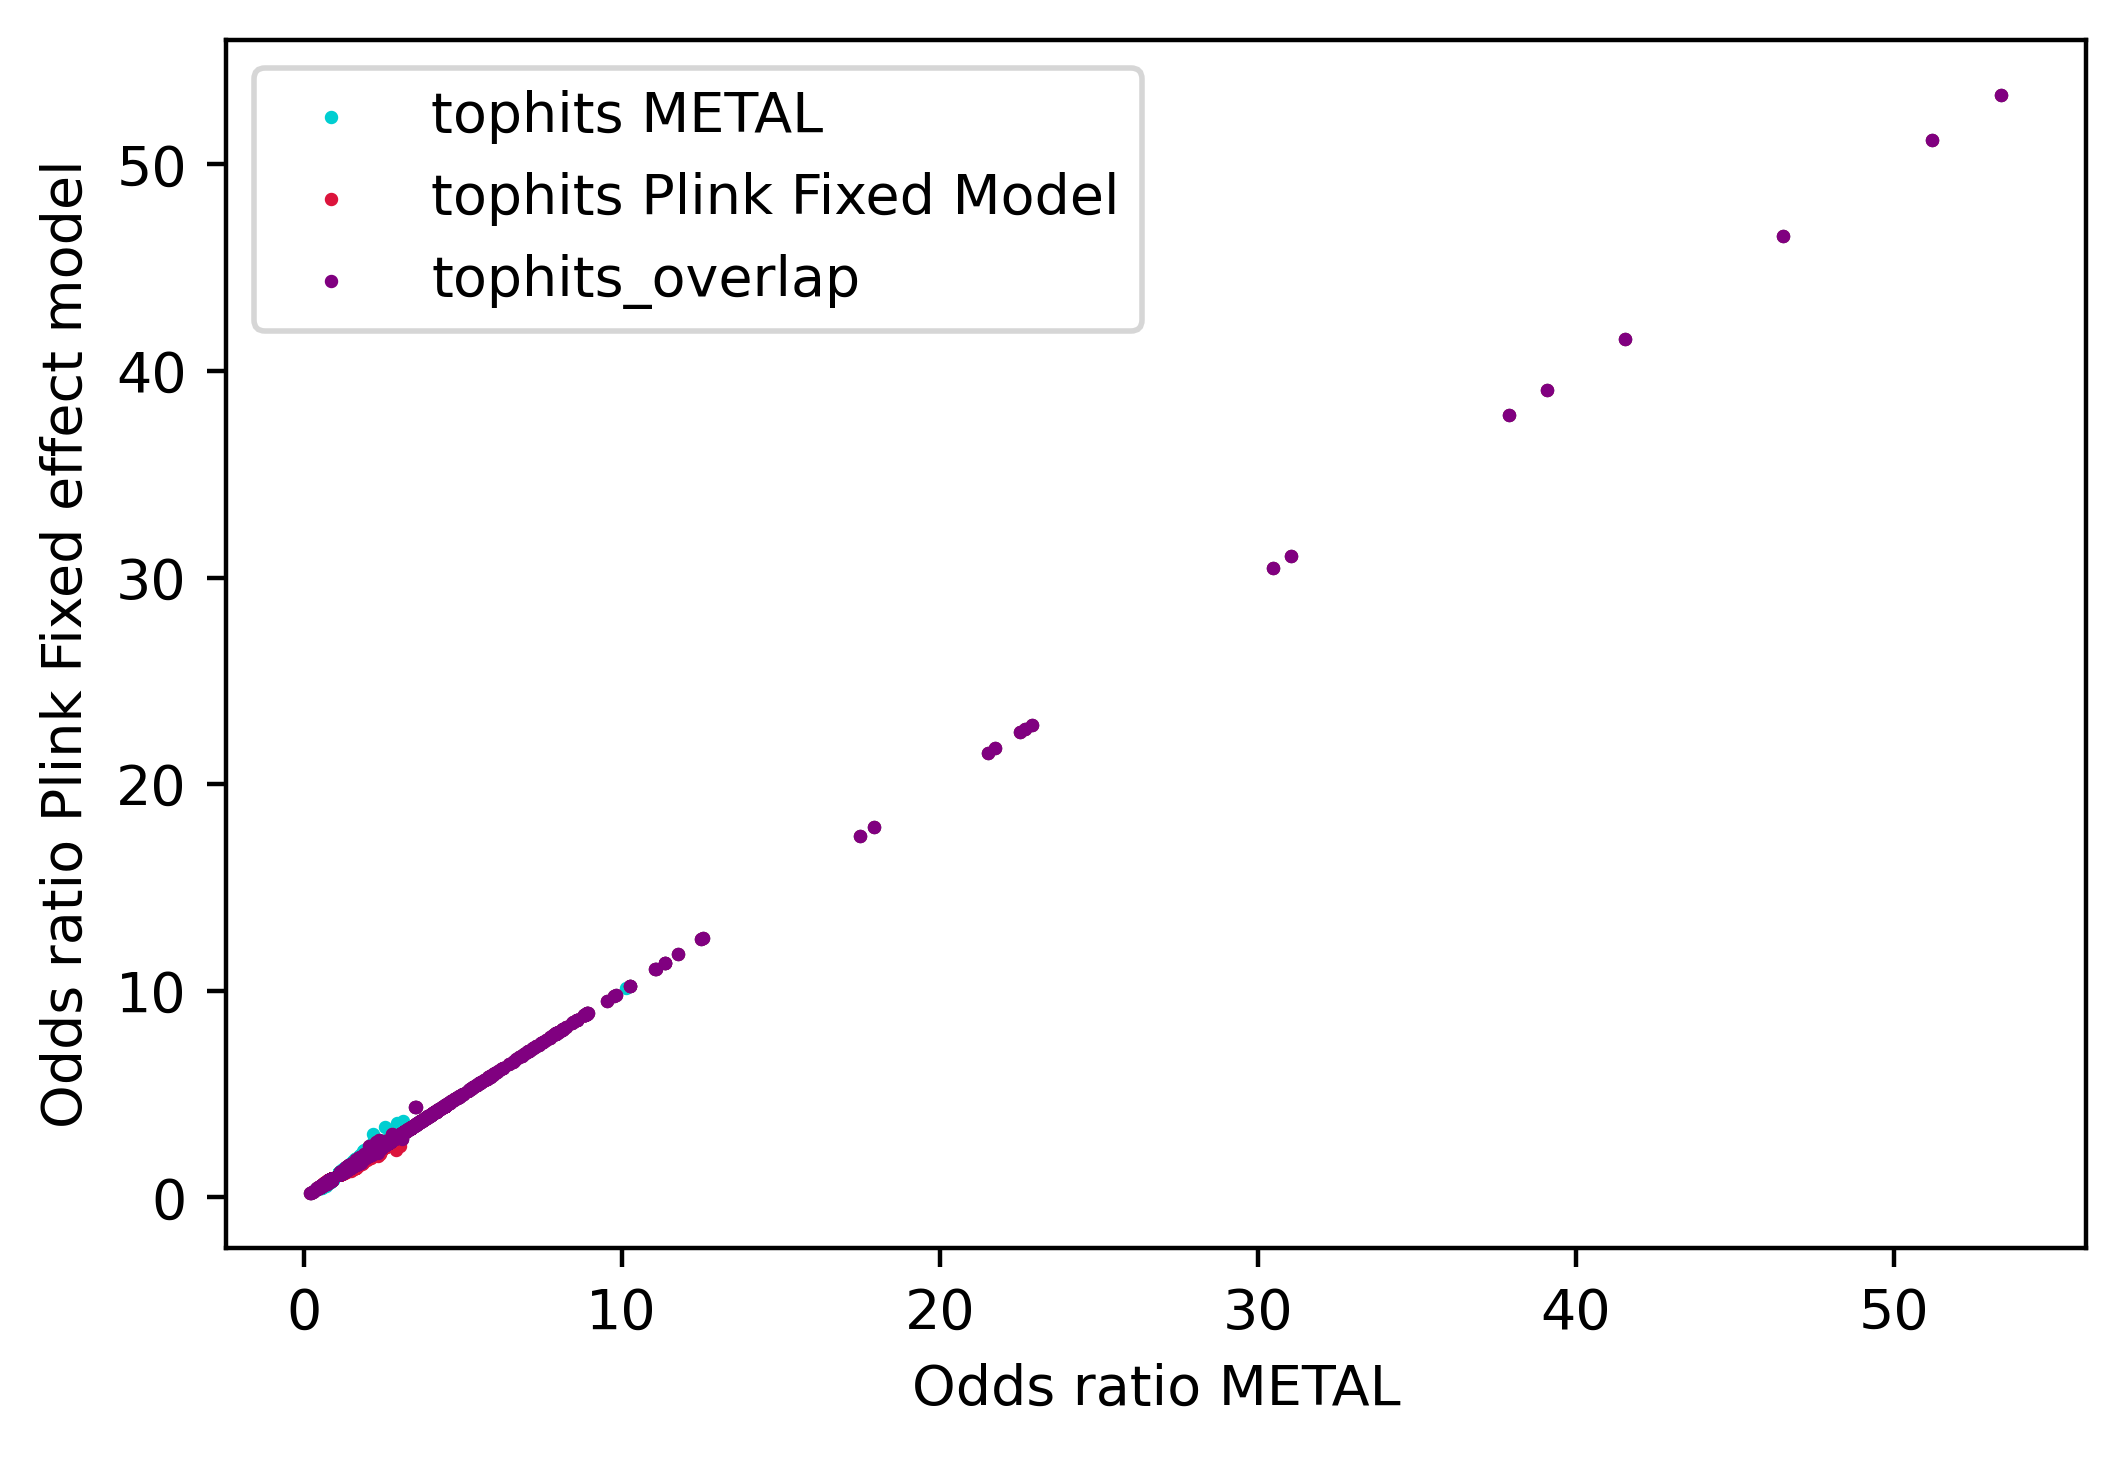

In [101]:
#SCATTER PLOT Odds ratio
# plink meta analysis result on fixed effect model, top 10k snps of each, vs METAL
plt.figure(dpi=400)
plt.xlabel('Odds ratio METAL')
plt.ylabel('Odds ratio Plink Fixed effect model')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])

colors1 = '#00CED1'
colors2 = '#DC143C'
colors3 = 'Purple'
# plt.xlim([0,4])
# plt.ylim([0,4])
plt.scatter(tophits_tools_plink_fixed['OR_METAL'],tophits_tools_plink_fixed['OR_Plink'],c=colors1,label='tophits METAL',s=2)
plt.scatter(tophits_tools_METAL['OR_METAL'],tophits_tools_METAL['OR_Plink'],c=colors2,label='tophits Plink Fixed Model',s=2)
plt.scatter(common_snp['OR_METAL_x'],common_snp['OR_Plink_x'],c=colors3,label='tophits_overlap',s=2)

# plt.scatter(,c=colors2,label='Samantha\'s GWAS')

plt.legend()
plt.show()
#Low stability

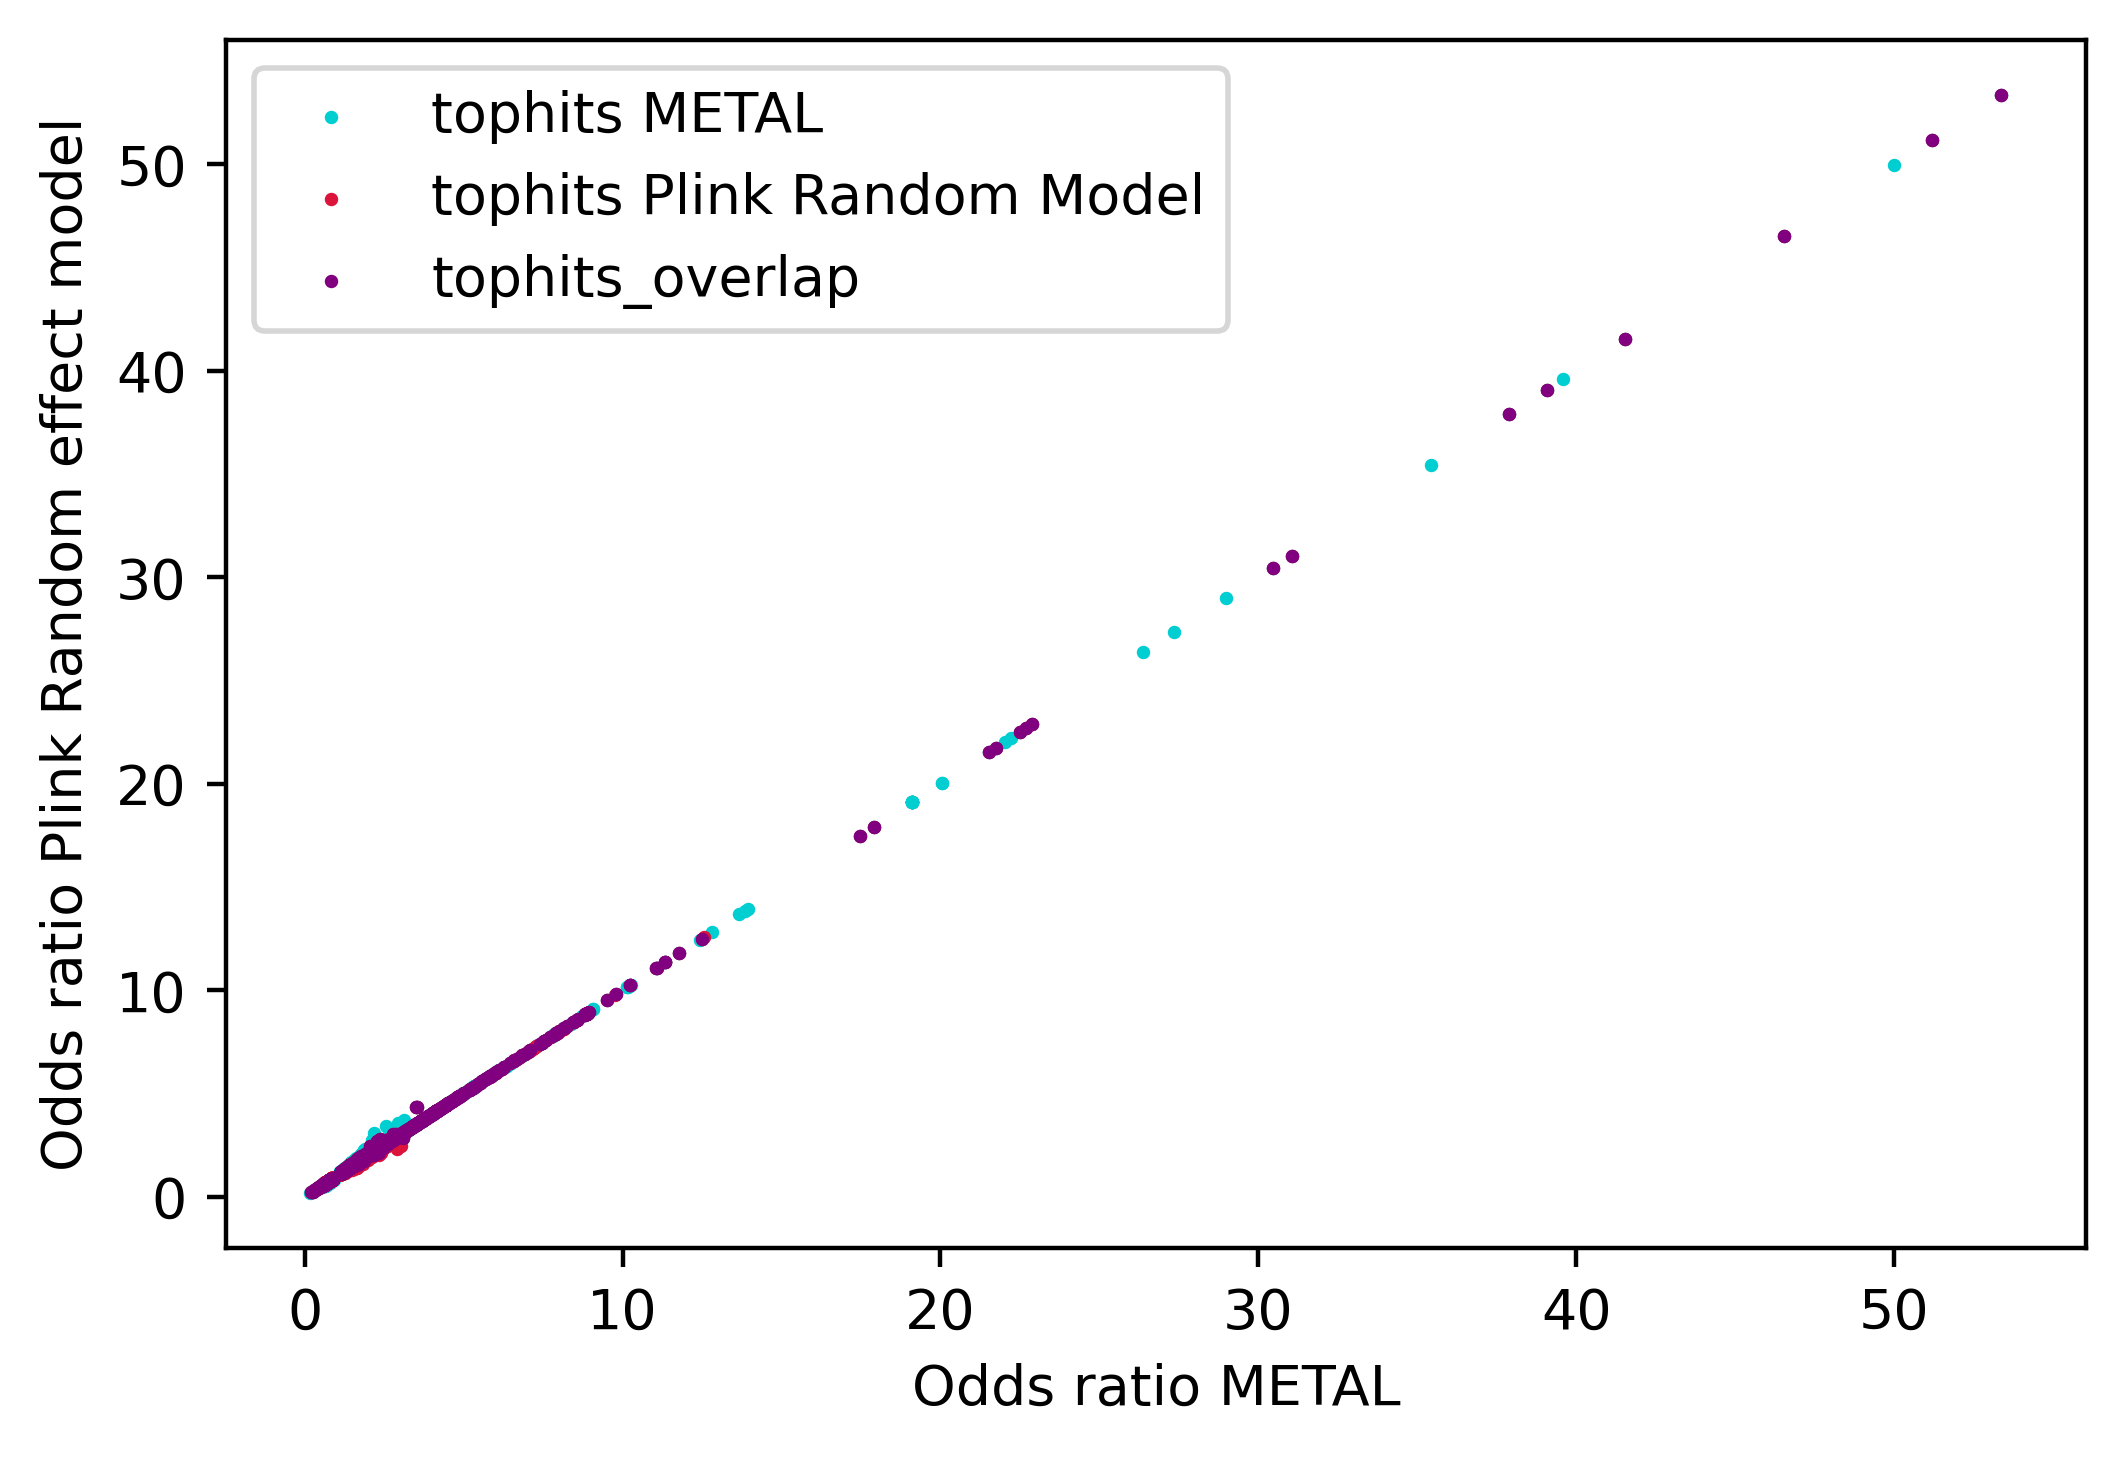

In [103]:
#SCATTER PLOT Odds ratio
# plink meta analysis result on random effect model, top 10k snps of each, vs METAL
plt.figure(dpi=400)
plt.xlabel('Odds ratio METAL')
plt.ylabel('Odds ratio Plink Random effect model')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])

colors1 = '#00CED1'
colors2 = '#DC143C'
colors3 = 'Purple'
# plt.xlim([0,4])
# plt.ylim([0,4])
plt.scatter(tophits_tools_plink_random['OR_METAL'],tophits_tools_plink_random['OR_Plink'],c=colors1,label='tophits METAL',s=2)
plt.scatter(tophits_tools_METAL['OR_METAL'],tophits_tools_METAL['OR_Plink'],c=colors2,label='tophits Plink Random Model',s=2)
plt.scatter(common_snp['OR_METAL_x'],common_snp['OR_Plink_x'],c=colors3,label='tophits_overlap',s=2)

# plt.scatter(,c=colors2,label='Samantha\'s GWAS')

plt.legend()
plt.show()
#Low stability

### below to fix remission in fam files

In [132]:
def getloclist(wd,end,filter_out):
    loc_list = []
    EIRA_found = False
    for root, dirs, files in os.walk(wd):
        for file in files:
            if file.endswith(end) and not file.endswith(filter_out):
                if root.split("/")[-2]=="EIRA":
                    loc = os.path.join(root, file)
                    loc_list.insert(0,loc)
                    EIRA_found = True
                else:
                    loc = os.path.join(root, file)
                    loc_list.append(loc) #get bim file location
    if EIRA_found == True:
        print("EIRA detected!")
    else:
        print("Warning! No EIRA bim detected! Use first scanned cohort as ref!")
    print("No of cohorts detected: ",len(loc_list))
    return loc_list

In [131]:
fam_pooled = pd.read_table('/exports/reum/knevel_lab/Scripts_Samantha/GWAS_run/Version8/All_cohorts_merged/cohorts_merged.fam',sep="\s+",header=None)
fam_pooled

,0,1,2,3,4,5
0,1_1_Leiden,1_1_Leiden,0,0,0,1
1,1_215284670,1_215284670,0,0,0,-9
2,2_2_Leiden,2_2_Leiden,0,0,0,-9
3,2_215294580,2_215294580,0,0,0,-9
4,3_3_Leiden,3_3_Leiden,0,0,0,1
...,...,...,...,...,...,...
5323,RAMS_521_RAMS_521,RAMS_521_RAMS_521,0,0,0,1
5324,RAMS_522_RAMS_522,RAMS_522_RAMS_522,0,0,0,1
5325,RAMS_525_RAMS_525,RAMS_525_RAMS_525,0,0,0,1
5326,RAMS_526_RAMS_526,RAMS_526_RAMS_526,0,0,0,2


In [147]:
def countRemission(fam):
    count_case = len(fam[fam[5]==2])
    count_control = len(fam[fam[5]==1])
    count_miss = len(fam[fam[5]==-9])+len(fam[fam[5]==0])
    plt.bar(["case",'control','missing'],[count_case,count_control,count_miss])
    plt.show()
    return count_case,count_control,count_miss

In [141]:
loc_list = getloclist("/exports/reum/CKe/Pipelinerun_withPC",".fam",("_noDup.fam","_Prepared.fam"))
loc_list

EIRA detected!
No of cohorts detected:  13


['/exports/reum/CKe/Pipelinerun_withPC/EIRA/mergedChr/EIRA_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/RAMS/mergedChr/RAMS_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Madrid/mergedChr/madrid_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Manchester/mergedChr/Manchester_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Tacera/Final_imputed/TACERA_HRCv1_1_FINAL.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/EARTH_B/mergedChr/EARTH_setB_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Glasgow/mergedChr/Glasgow_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/ACPA/mergedChr/ACPAneg_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/SERA/mergedChr/sera_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/EARTH_A/mergedChr/EA127genotypes_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/PEAC/mergedChr/PEAC_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Vienna/mergedChr/vienna_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/EAC/mergedChr/EAC_merged.fam']

In [185]:
# loc_list.remove( '/exports/reum/CKe/Pipelinerun_withPC/Manchester/mergedChr/Manchester_merged.fam')
# loc_list.remove( '/exports/reum/CKe/Pipelinerun_withPC/Tacera/Final_imputed/TACERA_HRCv1_1_FINAL.fam')
# loc_list.remove( '/exports/reum/CKe/Pipelinerun_withPC/Glasgow/mergedChr/Glasgow_merged.fam')

In [142]:
loc_list

['/exports/reum/CKe/Pipelinerun_withPC/EIRA/mergedChr/EIRA_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/RAMS/mergedChr/RAMS_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Madrid/mergedChr/madrid_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Manchester/mergedChr/Manchester_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Tacera/Final_imputed/TACERA_HRCv1_1_FINAL.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/EARTH_B/mergedChr/EARTH_setB_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Glasgow/mergedChr/Glasgow_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/ACPA/mergedChr/ACPAneg_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/SERA/mergedChr/sera_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/EARTH_A/mergedChr/EA127genotypes_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/PEAC/mergedChr/PEAC_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Vienna/mergedChr/vienna_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/EAC/mergedChr/EAC_merged.fam']

opening fam file:  EIRA_merged.fam


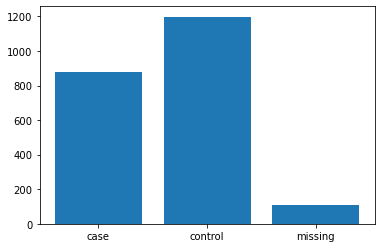

opening fam file:  RAMS_merged.fam


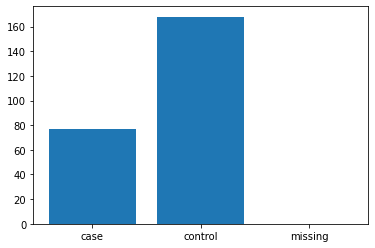

opening fam file:  madrid_merged.fam


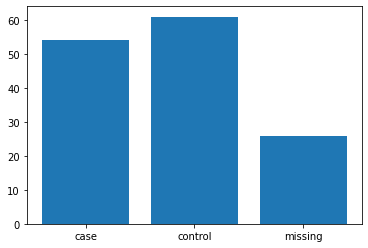

opening fam file:  Manchester_merged.fam


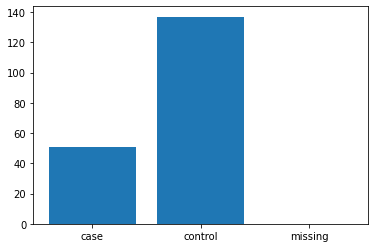

opening fam file:  TACERA_HRCv1_1_FINAL.fam


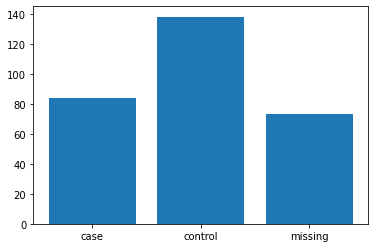

opening fam file:  EARTH_setB_merged.fam


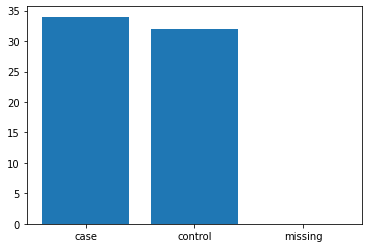

opening fam file:  Glasgow_merged.fam


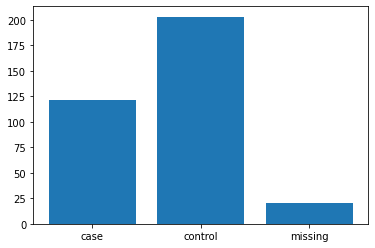

opening fam file:  ACPAneg_merged.fam


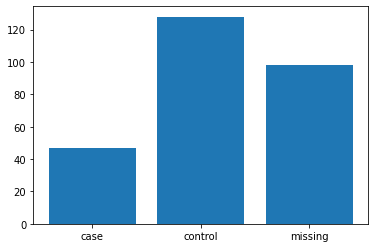

opening fam file:  sera_merged.fam


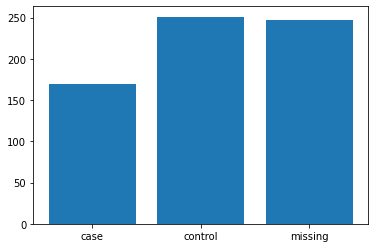

opening fam file:  EA127genotypes_merged.fam


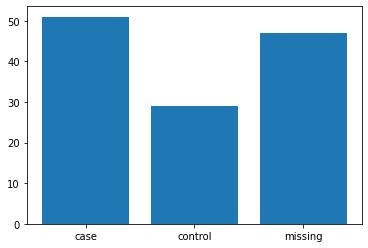

opening fam file:  PEAC_merged.fam


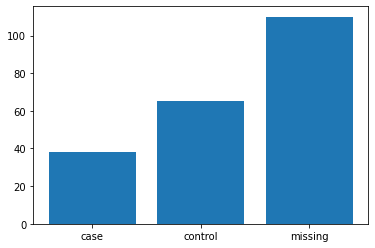

opening fam file:  vienna_merged.fam


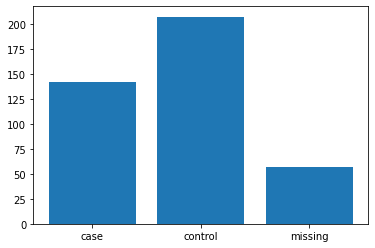

opening fam file:  EAC_merged.fam


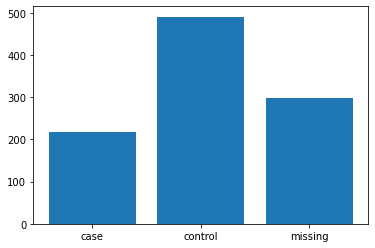

In [148]:
#check and flip remission in wrong fam files
list_wrongFAM = []
for i in range(len(loc_list)):
    fam_CKe = pd.read_table(loc_list[i],sep="\s+",header=None)
    print("opening fam file: ",loc_list[i].split("/")[-1])
    compareFAM = pd.merge(fam_CKe,fam_pooled,how='inner',on=0,suffixes=("_CKe","_Samantha"))
    if compareFAM[compareFAM['5_CKe']!=compareFAM['5_Samantha']].shape[0]!=0:
        print("identified diff fam remission stat at: ",loc_list[i]," count: ",compareFAM[compareFAM['5_CKe']!=compareFAM['5_Samantha']].shape[0])
        list_wrongFAM.append(loc_list[i])
        fam_CKe[5] = compareFAM['5_Samantha']
        #fam_CKe.to_csv(loc_list[i],header=False,index=False,sep=' ')
    countRemission(fam_CKe)

In [191]:
list_wrongFAM

['/exports/reum/CKe/Pipelinerun_withPC/Madrid/mergedChr/madrid_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/EARTH_B/mergedChr/EARTH_setB_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/ACPA/mergedChr/ACPAneg_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/SERA/mergedChr/sera_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/EARTH_A/mergedChr/EA127genotypes_merged.fam',
 '/exports/reum/CKe/Pipelinerun_withPC/Vienna/mergedChr/vienna_merged.fam']

In [136]:
list_wrongFAM

[]

In [ ]:
#generate list of info for forest plot of top 100 snps 

In [121]:
top100_plink_meta_fixed = Merged.sort_values(['P_latest_meta'])[:100].reset_index()
top100_plink_meta_fixed

,index,CHR_latest_meta,BP_latest_meta,SNP,A1_latest_meta,A2,N,P_latest_meta,P(R),OR_latest_meta,OR(R),Q,I,CHR_Samantha,BP_Samantha,A1_Samantha,TEST,NMISS_merged,OR_Samantha,SE,L95,U95,STAT,P_Samantha,NMISS_NMISSdata
0,856346,2,179448911,2:179448911:A,A,?,13,1.625000e-08,4.697000e-05,1.3375,1.3358,0.1730,26.89,2,179448911,A,ADD,4334,1.2630,0.05342,1.1370,1.4020,4.365,0.000013,5631.0
1,856288,2,179381715,2:179381715:C,C,?,13,8.957000e-08,1.513000e-04,1.3337,1.3331,0.1607,28.20,2,179381715,C,ADD,4312,1.2670,0.05546,1.1370,1.4130,4.273,0.000019,5599.0
2,856368,2,179490478,2:179490478:C,C,?,12,1.504000e-07,7.491000e-04,1.3191,1.2948,0.1414,31.21,2,179490478,C,ADD,4326,1.2610,0.05333,1.1360,1.4000,4.351,0.000014,5399.0
3,3970909,16,11223454,16:11223454:C,C,?,13,1.558000e-07,1.558000e-07,1.2546,1.2546,0.4953,0.00,16,11223454,C,ADD,4295,1.2010,0.04443,1.1010,1.3110,4.128,0.000037,5581.0
4,856340,2,179444939,2:179444939:T,T,?,13,2.128000e-07,2.351000e-04,1.3294,1.3170,0.1703,27.18,2,179444939,T,ADD,4337,1.2520,0.05700,1.1200,1.4000,3.943,0.000080,5634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2789297,9,103935521,9:103935521:T,T,?,13,2.541000e-05,2.541000e-05,1.2580,1.2580,0.5027,0.00,9,103935521,T,ADD,4326,1.2290,0.05644,1.1010,1.3730,3.658,0.000254,5618.0
96,2789289,9,103933581,9:103933581:C,C,?,13,2.613000e-05,2.613000e-05,1.2657,1.2657,0.5100,0.00,9,103933581,C,ADD,4324,1.2300,0.05769,1.0980,1.3770,3.582,0.000341,5616.0
97,3024299,10,107296666,10:107296666:A,A,?,11,2.647000e-05,2.647000e-05,1.8175,1.8175,0.8199,0.00,10,107296666,A,ADD,4316,1.7810,0.14330,1.3450,2.3580,4.026,0.000057,4750.0
98,3207823,11,83502789,11:83502789:A,A,?,12,2.661000e-05,2.661000e-05,0.7879,0.7879,0.8230,0.00,11,83502789,A,ADD,4311,0.7974,0.05693,0.7132,0.8915,-3.976,0.000070,5381.0


In [122]:
list_top100 = top100_plink_meta_fixed['SNP'].tolist()
list_top100

['2:179448911:A',
 '2:179381715:C',
 '2:179490478:C',
 '16:11223454:C',
 '2:179444939:T',
 '2:179444137:G',
 '2:179411665:G',
 '2:179514433:C',
 '2:179430997:A',
 '2:179458591:T',
 '2:179457147:A',
 '13:86311267:G',
 '2:179398823:A',
 '2:179388490:A',
 '8:74435989:C',
 '2:179421470:G',
 '2:179392080:T',
 '2:179388657:A',
 '2:179388994:G',
 '5:119178721:A',
 '6:156289111:A',
 '2:179382809:G',
 '6:166310711:A',
 '2:179380165:G',
 '2:179451420:A',
 '11:83482969:A',
 '2:179380096:G',
 '2:179421694:G',
 '2:179447848:C',
 '2:179443217:G',
 '6:69670142:C',
 '11:83481941:C',
 '9:103934889:T',
 '7:140117809:C',
 '2:179491235:G',
 '2:179462142:G',
 '2:179488194:T',
 '2:4117199:G',
 '11:83501966:C',
 '2:179427536:C',
 '2:179490785:T',
 '2:4126194:A',
 '17:6236228:A',
 '9:103940534:A',
 '11:83471079:T',
 '2:221687738:G',
 '11:83498799:G',
 '2:179595117:G',
 '13:38357494:A',
 '8:144550160:A',
 '14:63155372:C',
 '2:4136145:G',
 '11:83489364:A',
 '16:11283168:G',
 '11:76757355:A',
 '13:111427824:T',


In [6]:
plink_meta_Leedsfixed['CHRBP'] = plink_meta_Leedsfixed['SNP'].str.rsplit(":",n=1,expand=True)[0]
plink_meta_Leedsfixed

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I,CHRBP
0,1,693731,1:693731:G,G,?,11,0.62190,0.62190,1.0398,1.0398,0.7531,0.00,1:693731
1,1,705882,1:705882:A,A,?,5,0.39180,0.39180,1.4027,1.4027,0.5642,0.00,1:705882
2,1,706368,1:706368:G,G,?,5,0.57840,0.67950,1.1170,1.1319,0.2470,26.18,1:706368
3,1,713977,1:713977:T,T,?,3,0.03283,0.03283,3.8098,3.8098,0.7492,0.00,1:713977
4,1,714439,1:714439:A,A,?,4,0.06788,0.06788,3.2967,3.2967,0.8314,0.00,1:714439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8913171,22,51226692,22:51226692:A,A,?,2,0.44680,0.44680,1.7068,1.7068,0.5401,0.00,22:51226692
8913172,22,51229805,22:51229805:C,C,?,13,0.92950,0.92950,1.0077,1.0077,0.8599,0.00,22:51229805
8913173,22,51232488,22:51232488:G,G,?,8,0.48810,0.48810,1.1980,1.1980,0.4454,0.00,22:51232488
8913174,22,51237063,22:51237063:C,C,?,13,0.27680,0.27680,0.9360,0.9360,0.5234,0.00,22:51237063


In [12]:
IndSigSNPs_list = ['2:179448911',
'16:11223454',
'8:74435989',
'5:119178721',
'13:86311267',
'6:166310711',
'6:156289111',
'6:69670142',
'11:83482969',
'8:144550160',
'7:140117809',
'17:6236228',
'9:103934889',
'2:221687738']
len(IndSigSNPs_list)

14

In [104]:
IndSigSNPs_list_pos = IndSigSNPs_pos['CHRBP']
len(IndSigSNPs_list_pos)

13

In [166]:
for i in range(len(IndSigSNPs_list_pos)):
    print(plink_meta_Leedsfixed[plink_meta_Leedsfixed['CHRBP']==IndSigSNPs_list_pos[i]]['A1'])

946651    G
Name: A1, dtype: object
1469948    A
Name: A1, dtype: object
1469961    T
Name: A1, dtype: object
3294561    A
Name: A1, dtype: object
3718140    C
Name: A1, dtype: object
3988897    A
Name: A1, dtype: object
4022028    A
Name: A1, dtype: object
4477105    C
Name: A1, dtype: object
4810988    C
Name: A1, dtype: object
5291538    T
Name: A1, dtype: object
6112824    A
Name: A1, dtype: object
6909347    G
Name: A1, dtype: object
7591795    C
Name: A1, dtype: object


In [106]:
mapped_gene_pos = pd.read_table("/exports/reum/CKe/Pipelinerun_withPC/genes_pos.txt")
mapped_gene_pos

,ensg,symbol,chr,start,end,strand,type,entrezID,HUGO,pLI,ncRVIS,posMapSNPs,posMapMaxCADD,minGwasP,IndSigSNPs,GenomicLocus
0,ENSG00000116095,PLEKHA3,2,179345195,179381189,1,protein_coding,65977.0,PLEKHA3,2.297870e-02,-0.310486,14,9.680,8.957000e-08,rs2288569;rs16866400,2
1,ENSG00000237298,TTN-AS1,2,179385910,179639402,1,antisense,100506866.0,TTN-AS1,NaN,NaN,76,25.500,1.625000e-08,rs2288569;rs16866400,2
2,ENSG00000155657,TTN,2,179390716,179695529,-1,protein_coding,7273.0,TTN,1.211114e-32,-0.562315,74,25.500,1.625000e-08,rs16866400;rs2288569,2
3,ENSG00000270956,RP11-65L3.4,2,179405852,179406526,1,antisense,NaN,NaN,NaN,NaN,13,25.500,5.272000e-07,rs16866400;rs2288569,2
4,ENSG00000270277,RP11-65L3.2,2,179413611,179415408,1,antisense,NaN,NaN,NaN,NaN,12,25.500,5.272000e-07,rs2288569;rs16866400,2
5,ENSG00000271011,RP11-171I2.5,2,179441830,179442349,1,antisense,NaN,NaN,NaN,NaN,8,23.800,1.625000e-08,rs2288569;rs16866400,2
6,ENSG00000270574,RP11-171I2.2,2,179443517,179445633,1,antisense,NaN,NaN,NaN,NaN,10,23.800,1.625000e-08,rs2288569;rs16866400,2
7,ENSG00000271141,RP11-171I2.4,2,179481308,179481850,1,lincRNA,NaN,NaN,NaN,NaN,7,16.590,1.504000e-07,rs16866400;rs2288569,2
8,ENSG00000271401,RP11-171I2.3,2,179509444,179509906,1,lincRNA,NaN,NaN,NaN,NaN,2,4.253,7.974000e-07,rs16866400;rs2288569,2
9,ENSG00000267784,RP11-171I2.1,2,179588184,179591773,1,antisense,NaN,NaN,NaN,NaN,2,5.380,1.207000e-05,rs16866400,2


In [17]:
mapped_gene = pd.read_table("/exports/reum/CKe/Pipelinerun_withPC/genes.txt")
mapped_gene

,ensg,symbol,chr,start,end,strand,type,entrezID,HUGO,pLI,ncRVIS,eqtlMapSNPs,eqtlMapminP,eqtlMapminQ,eqtlMapts,eqtlDirection,minGwasP,IndSigSNPs,GenomicLocus
0,ENSG00000196659,TTC30B,2,178413726,178417742,-1,protein_coding,150737.0,TTC30B,1.861851e-03,0.372802,5,NaN,4.900000e-02,CMC_SVA_cis:CMC_NoSVA_cis,+,5.878000e-07,rs16866406;rs16866400,1
1,ENSG00000260931,RP11-65L3.1,2,179265561,179267618,1,lincRNA,NaN,NaN,NaN,NaN,9,NaN,4.900000e-02,CMC_SVA_cis,-,2.362000e-08,rs16866400;rs16866406,1
2,ENSG00000223960,AC009948.5,2,179278666,179304970,1,antisense,101927027.0,LOC101927027,NaN,NaN,3,2.047200e-07,6.611364e-04,eQTLGen_cis_eQTLs:BIOSQTL/BIOS_eQTL_geneLevel,+,1.479000e-05,rs16866400;rs16866406,1
3,ENSG00000180228,PRKRA,2,179296141,179316239,-1,protein_coding,8575.0,PRKRA,1.545420e-01,1.651721,44,8.461400e-17,0.000000e+00,eQTLGen_cis_eQTLs:BIOSQTL/BIOS_eQTL_geneLevel:...,-,2.362000e-08,rs16866400;rs16866406,1
4,ENSG00000079150,FKBP7,2,179328391,179343327,-1,protein_coding,51661.0,FKBP7,3.156024e-05,-1.117579,72,1.838020e-16,2.721880e-33,eQTLcatalogue/TwinsUK_ge_fat:GTEx/v8/Adipose_S...,+,2.362000e-08,rs16866406;rs16866400,1
5,ENSG00000116095,PLEKHA3,2,179345195,179381189,1,protein_coding,65977.0,PLEKHA3,2.297870e-02,-0.310486,70,7.366080e-13,5.177110e-20,GTEx/v8/Cells_Cultured_fibroblasts:GTEx/v7/Cel...,-,2.362000e-08,rs16866406;rs16866400,1
6,ENSG00000237298,TTN-AS1,2,179385910,179639402,1,antisense,100506866.0,TTN-AS1,NaN,NaN,74,1.334650e-20,0.000000e+00,eQTLcatalogue/BrainSeq_ge_brain:eQTLcatalogue/...,-,2.362000e-08,rs16866406;rs16866400,1
7,ENSG00000155657,TTN,2,179390716,179695529,-1,protein_coding,7273.0,TTN,1.211114e-32,-0.562315,73,6.054850e-15,0.000000e+00,eQTLcatalogue/Quach_2016_ge_monocyte_R848:Psyc...,-,2.362000e-08,rs16866406;rs16866400,1
8,ENSG00000270956,RP11-65L3.4,2,179405852,179406526,1,antisense,NaN,NaN,NaN,NaN,29,4.086067e-07,3.546850e-02,DICE/Monocyte_classical:DICE/Monocyte_non_clas...,-,2.362000e-08,rs16866400;rs16866406,1
9,ENSG00000270277,RP11-65L3.2,2,179413611,179415408,1,antisense,NaN,NaN,NaN,NaN,1,2.322970e-06,1.161480e-02,eQTLcatalogue/Quach_2016_ge_monocyte_R848,+,1.479000e-05,rs16866400,1


In [20]:
mapped_gene['gene_loc']=mapped_gene['start'].astype(str)+":"+mapped_gene['end'].astype(str)
mapped_gene

,ensg,symbol,chr,start,end,strand,type,entrezID,HUGO,pLI,ncRVIS,eqtlMapSNPs,eqtlMapminP,eqtlMapminQ,eqtlMapts,eqtlDirection,minGwasP,IndSigSNPs,GenomicLocus,gene_loc
0,ENSG00000196659,TTC30B,2,178413726,178417742,-1,protein_coding,150737.0,TTC30B,1.861851e-03,0.372802,5,NaN,4.900000e-02,CMC_SVA_cis:CMC_NoSVA_cis,+,5.878000e-07,rs16866406;rs16866400,1,178413726:178417742
1,ENSG00000260931,RP11-65L3.1,2,179265561,179267618,1,lincRNA,NaN,NaN,NaN,NaN,9,NaN,4.900000e-02,CMC_SVA_cis,-,2.362000e-08,rs16866400;rs16866406,1,179265561:179267618
2,ENSG00000223960,AC009948.5,2,179278666,179304970,1,antisense,101927027.0,LOC101927027,NaN,NaN,3,2.047200e-07,6.611364e-04,eQTLGen_cis_eQTLs:BIOSQTL/BIOS_eQTL_geneLevel,+,1.479000e-05,rs16866400;rs16866406,1,179278666:179304970
3,ENSG00000180228,PRKRA,2,179296141,179316239,-1,protein_coding,8575.0,PRKRA,1.545420e-01,1.651721,44,8.461400e-17,0.000000e+00,eQTLGen_cis_eQTLs:BIOSQTL/BIOS_eQTL_geneLevel:...,-,2.362000e-08,rs16866400;rs16866406,1,179296141:179316239
4,ENSG00000079150,FKBP7,2,179328391,179343327,-1,protein_coding,51661.0,FKBP7,3.156024e-05,-1.117579,72,1.838020e-16,2.721880e-33,eQTLcatalogue/TwinsUK_ge_fat:GTEx/v8/Adipose_S...,+,2.362000e-08,rs16866406;rs16866400,1,179328391:179343327
5,ENSG00000116095,PLEKHA3,2,179345195,179381189,1,protein_coding,65977.0,PLEKHA3,2.297870e-02,-0.310486,70,7.366080e-13,5.177110e-20,GTEx/v8/Cells_Cultured_fibroblasts:GTEx/v7/Cel...,-,2.362000e-08,rs16866406;rs16866400,1,179345195:179381189
6,ENSG00000237298,TTN-AS1,2,179385910,179639402,1,antisense,100506866.0,TTN-AS1,NaN,NaN,74,1.334650e-20,0.000000e+00,eQTLcatalogue/BrainSeq_ge_brain:eQTLcatalogue/...,-,2.362000e-08,rs16866406;rs16866400,1,179385910:179639402
7,ENSG00000155657,TTN,2,179390716,179695529,-1,protein_coding,7273.0,TTN,1.211114e-32,-0.562315,73,6.054850e-15,0.000000e+00,eQTLcatalogue/Quach_2016_ge_monocyte_R848:Psyc...,-,2.362000e-08,rs16866406;rs16866400,1,179390716:179695529
8,ENSG00000270956,RP11-65L3.4,2,179405852,179406526,1,antisense,NaN,NaN,NaN,NaN,29,4.086067e-07,3.546850e-02,DICE/Monocyte_classical:DICE/Monocyte_non_clas...,-,2.362000e-08,rs16866400;rs16866406,1,179405852:179406526
9,ENSG00000270277,RP11-65L3.2,2,179413611,179415408,1,antisense,NaN,NaN,NaN,NaN,1,2.322970e-06,1.161480e-02,eQTLcatalogue/Quach_2016_ge_monocyte_R848,+,1.479000e-05,rs16866400,1,179413611:179415408


In [164]:
list_gene = [' AC012445.1']

In [165]:
gene_loc = ""
pLI = ""
gene_type = ""
for i in list_gene:
#     gene_loc = gene_loc + "," + mapped_gene[mapped_gene['symbol']==i]['gene_loc'].tolist()[0]
    pLI = pLI +","+ str(mapped_gene_pos[mapped_gene_pos['symbol']==i]['pLI'].tolist()[0])
    gene_type = gene_type + "," + mapped_gene_pos[mapped_gene_pos['symbol']==i]['type'].tolist()[0]
#     print(mapped_gene[mapped_gene['symbol']==i].loc[:,['gene_loc','pLI','type']])
print(gene_loc)
print(pLI)
print(gene_type)

IndexError: list index out of range

In [167]:
GWAScatlog = pd.read_table("/exports/reum/CKe/Pipelinerun_withPC/gwascatalog.txt")
GWAScatlog

,GenomicLocus,IndSigSNP,chr,bp,snp,DateAddedToCatalog,PMID,FirstAuth,Date,Journal,Link,Study,Trait,InitialN,ReplicationN,Region,ReportedGene,MappedGene,UpGene,DownGene,SNP_Gene_ID,UpGeneDist,DownGeneDist,Strongest,SNPs,marged,SNP_ID_cur,Context,intergenic,RiskAF,P,Pmlog,Ptext,OrBeta,95CI,Platform,CNV
0,1,rs16866400,2,179381323,rs6735077,2021-09-03,34338756,Ahlberg G,2021-07-29,Eur Heart J,www.ncbi.nlm.nih.gov/pubmed/34338756,Genome-wide association study identifies 18 no...,Left atrial passive emptying fraction,"35,658 British ancestry individuals",NaN,2q31.2,NaN,PLEKHA3 - TTN-AS1,ENSG00000116095,ENSG00000237298,NaN,133.0,4587.0,rs6735077-?,rs6735077,0,6735077,intergenic_variant,1,NR,6.000000e-09,8.221849,NaN,0.422000,[0.28-0.56] unit increase,Affymetrix [10600000] (imputed),N
1,1,rs16866406,2,179388994,rs16866369,2018-01-19,29221444,Divers J,2017-12-08,BMC Genet,www.ncbi.nlm.nih.gov/pubmed/29221444,Genome-wide association study of coronary arte...,Coronary artery calcified atherosclerotic plaq...,"345 African American cases, 346 African Americ...","137 African American cases, 68 African America...",2q31.2,LOC100506866,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs16866369-?,rs16866369,0,16866369,intron_variant,0,NR,7.000000e-06,5.154902,NaN,0.121000,[0.056-0.186] unit decrease,Illumina [at least 13000000] (imputed),N
2,1,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular end-systolic volume,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,2.000000e-17,16.698970,NaN,1.453200,[1.12-1.79] unit increase,Affymetrix [~ 9500000] (imputed),N
3,1,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular ejection fraction,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,4.000000e-10,9.397940,NaN,0.455600,[0.31-0.6] unit decrease,Affymetrix [~ 9500000] (imputed),N
4,1,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular mass,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,4.000000e-13,12.397940,NaN,1.094000,[0.8-1.39] unit increase,Affymetrix [~ 9500000] (imputed),N
5,1,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular end-diastolic volume,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,1.000000e-11,11.000000,NaN,1.988700,[1.41-2.57] unit increase,Affymetrix [~ 9500000] (imputed),N
6,1,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular global circumferential strain,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,5.000000e-14,13.301030,NaN,0.300500,[0.22-0.38] unit increase,Affymetrix [~ 9500000] (imputed),N
7,1,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular global radial strain,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,8.000000e-09,8.096910

In [177]:
GWAScatlog_pos = pd.read_table("/exports/reum/CKe/Pipelinerun_withPC/gwascatalog_pos.txt")
GWAScatlog_pos

,GenomicLocus,IndSigSNP,chr,bp,snp,DateAddedToCatalog,PMID,FirstAuth,Date,Journal,Link,Study,Trait,InitialN,ReplicationN,Region,ReportedGene,MappedGene,UpGene,DownGene,SNP_Gene_ID,UpGeneDist,DownGeneDist,Strongest,SNPs,marged,SNP_ID_cur,Context,intergenic,RiskAF,P,Pmlog,Ptext,OrBeta,95CI,Platform,CNV
0,2,rs16866400,2,179381323,rs6735077,2021-09-03,34338756,Ahlberg G,2021-07-29,Eur Heart J,www.ncbi.nlm.nih.gov/pubmed/34338756,Genome-wide association study identifies 18 no...,Left atrial passive emptying fraction,"35,658 British ancestry individuals",NaN,2q31.2,NaN,PLEKHA3 - TTN-AS1,ENSG00000116095,ENSG00000237298,NaN,133.0,4587.0,rs6735077-?,rs6735077,0,6735077,intergenic_variant,1,NR,6.000000e-09,8.221849,NaN,0.422000,[0.28-0.56] unit increase,Affymetrix [10600000] (imputed),N
1,2,rs2288569,2,179388994,rs16866369,2018-01-19,29221444,Divers J,2017-12-08,BMC Genet,www.ncbi.nlm.nih.gov/pubmed/29221444,Genome-wide association study of coronary arte...,Coronary artery calcified atherosclerotic plaq...,"345 African American cases, 346 African Americ...","137 African American cases, 68 African America...",2q31.2,LOC100506866,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs16866369-?,rs16866369,0,16866369,intron_variant,0,NR,7.000000e-06,5.154902,NaN,0.121000,[0.056-0.186] unit decrease,Illumina [at least 13000000] (imputed),N
2,2,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular end-systolic volume,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,2.000000e-17,16.698970,NaN,1.453200,[1.12-1.79] unit increase,Affymetrix [~ 9500000] (imputed),N
3,2,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular ejection fraction,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,4.000000e-10,9.397940,NaN,0.455600,[0.31-0.6] unit decrease,Affymetrix [~ 9500000] (imputed),N
4,2,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular mass,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,4.000000e-13,12.397940,NaN,1.094000,[0.8-1.39] unit increase,Affymetrix [~ 9500000] (imputed),N
5,2,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular end-diastolic volume,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,1.000000e-11,11.000000,NaN,1.988700,[1.41-2.57] unit increase,Affymetrix [~ 9500000] (imputed),N
6,2,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular global circumferential strain,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,5.000000e-14,13.301030,NaN,0.300500,[0.22-0.38] unit increase,Affymetrix [~ 9500000] (imputed),N
7,2,rs16866400,2,179389742,rs6755784,2021-03-05,33495596,Tadros R,2021-01-25,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33495596,Shared genetic pathways contribute to risk of ...,Left ventricular global radial strain,"19,260 European ancestry individuals",NaN,2q31.2,TTN,TTN-AS1,NaN,NaN,ENSG00000237298,NaN,NaN,rs6755784-G,rs6755784,0,6755784,intron_variant,0,0.8156,8.000000e-09,8.096910,

In [178]:
trait_pos = pd.merge(IndSigSNPs_pos,GWAScatlog_pos,how='inner',left_on='rsID',right_on='IndSigSNP').loc[:,['rsID','Trait']]
for i in trait_pos['rsID'].unique():
    for j in itterrow
    trait_pos[trait_pos['rsID']==i]

,rsID,Trait
0,rs16866400,Left atrial passive emptying fraction
1,rs16866400,Left ventricular end-systolic volume
2,rs16866400,Left ventricular ejection fraction
3,rs16866400,Left ventricular mass
4,rs16866400,Left ventricular end-diastolic volume
5,rs16866400,Left ventricular global circumferential strain
6,rs16866400,Left ventricular global radial strain
7,rs16866400,Atrial fibrillation
8,rs16866400,Waist-to-hip ratio adjusted for BMI x sex inte...
9,rs16866400,PR interval


In [179]:
pd.merge(IndSigSNPs,GWAScatlog,how='inner',left_on='rsID',right_on='IndSigSNP').loc[:,['rsID','Trait']]

,rsID,Trait
0,rs16866400,Left atrial passive emptying fraction
1,rs16866400,Left ventricular end-systolic volume
2,rs16866400,Left ventricular ejection fraction
3,rs16866400,Left ventricular mass
4,rs16866400,Left ventricular end-diastolic volume
5,rs16866400,Left ventricular global circumferential strain
6,rs16866400,Left ventricular global radial strain
7,rs16866400,Atrial fibrillation
8,rs16866400,Waist-to-hip ratio adjusted for BMI x sex inte...
9,rs16866400,PR interval


In [ ]:
Coronary artery calcified atherosclerotic plaq...
Atrial fibrillation
Atrial fibrillation
Atrial fibrillation
Electrocardiogram morphology (amplitude at tem...
Electrocardiogram morphology (amplitude at tem...
Atrial fibrillation

In [173]:
IndSigSNPs = pd.read_table("../IndSigSNPs.txt")
IndSigSNPs['CHRBP'] = IndSigSNPs['uniqID'].str.rsplit(":",n=2,expand=True)[0]
IndSigSNPs = IndSigSNPs.sort_values("p")
IndSigSNPs

,No,GenomicLocus,uniqID,rsID,chr,pos,p,nSNPs,nGWASSNPs,CHRBP
0,1,1,2:179448911:A:G,rs16866400,2,179448911,2.362000e-08,49,25,2:179448911
13,14,13,16:11223454:C:G,rs11645657,16,11223454,1.134000e-07,44,20,16:11223454
1,2,1,2:179457147:A:G,rs16866406,2,179457147,1.196000e-06,43,19,2:179457147
8,9,8,8:74435989:C:T,rs7846061,8,74435989,1.445000e-06,15,8,8:74435989
3,4,3,5:119178721:A:T,rs7708816,5,119178721,1.526000e-06,5,3,5:119178721
12,13,12,13:86311267:A:G,rs116988987,13,86311267,1.944000e-06,1,1,13:86311267
6,7,6,6:166310711:A:G,rs2461720,6,166310711,2.918000e-06,47,24,6:166310711
5,6,5,6:156289111:A:C,rs6931683,6,156289111,3.135000e-06,57,25,6:156289111
4,5,4,6:69670142:C:G,rs3757043,6,69670142,5.419000e-06,5,3,6:69670142
11,12,11,11:83482969:A:T,rs7116090,11,83482969,6.046000e-06,54,21,11:83482969


In [174]:
IndSigSNPs_pos = pd.read_table("../IndSigSNPs_pos.txt")
IndSigSNPs_pos['CHRBP'] = IndSigSNPs_pos['uniqID'].str.rsplit(":",n=2,expand=True)[0]
IndSigSNPs_pos = IndSigSNPs_pos.sort_values("p")
IndSigSNPs_pos

,No,GenomicLocus,uniqID,rsID,chr,pos,p,nSNPs,nGWASSNPs,CHRBP
1,2,2,2:179448911:A:G,rs16866400,2,179448911,1.625000e-08,49,25,2:179448911
12,13,12,16:11223454:C:G,rs11645657,16,11223454,1.558000e-07,44,20,16:11223454
2,3,2,2:179458591:C:T,rs2288569,2,179458591,1.028000e-06,41,19,2:179458591
11,12,11,13:86311267:A:G,rs116988987,13,86311267,1.296000e-06,1,1,13:86311267
8,9,8,8:74435989:C:T,rs7846061,8,74435989,1.454000e-06,15,8,8:74435989
3,4,3,5:119178721:A:T,rs7708816,5,119178721,2.479000e-06,5,3,5:119178721
5,6,5,6:156289111:A:C,rs6931683,6,156289111,2.697000e-06,57,25,6:156289111
6,7,6,6:166310711:A:G,rs2461720,6,166310711,3.160000e-06,47,24,6:166310711
10,11,10,11:83482969:A:T,rs7116090,11,83482969,5.286000e-06,54,21,11:83482969
4,5,4,6:69670142:C:G,rs3757043,6,69670142,6.792000e-06,5,3,6:69670142


In [101]:
IndSigSNPs_pos.to_excel("../IndSigSNPs_pos.xlsx")

In [97]:
Merged_IndsigSNPs_pos = pd.merge(plink_meta_Leedsfixed,IndSigSNPs_pos,how='inner',left_on='CHRBP',right_on='CHRBP')
Merged_IndsigSNPs_pos

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I,CHRBP,No,GenomicLocus,uniqID,rsID,chr,pos,p,nSNPs,nGWASSNPs
0,2,4117199,2:4117199:G,G,?,12,1.037000e-05,1.037000e-05,1.2314,1.2314,0.6088,0.00,2:4117199,1,1,2:4117199:C:G,rs4850040,2,4117199,8.871000e-06,58,21
1,2,179448911,2:179448911:A,A,?,13,2.362000e-08,6.021000e-05,1.3347,1.3314,0.1774,26.43,2:179448911,2,2,2:179448911:A:G,rs16866400,2,179448911,1.625000e-08,49,25
2,2,179458591,2:179458591:T,T,?,13,1.196000e-06,1.490000e-03,1.3347,1.3113,0.1357,30.97,2:179458591,3,2,2:179458591:C:T,rs2288569,2,179458591,1.028000e-06,41,19
3,5,119178721,5:119178721:A,A,?,12,1.526000e-06,5.758000e-03,1.4562,1.4437,0.0552,43.13,5:119178721,4,3,5:119178721:A:T,rs7708816,5,119178721,2.479000e-06,5,3
4,6,69670142,6:69670142:C,C,?,12,5.419000e-06,2.793000e-04,1.2416,1.2285,0.3332,11.40,6:69670142,5,4,6:69670142:C:G,rs3757043,6,69670142,6.792000e-06,5,3
5,6,156289111,6:156289111:A,A,?,12,3.135000e-06,3.135000e-06,0.8108,0.8108,0.9791,0.00,6:156289111,6,5,6:156289111:A:C,rs6931683,6,156289111,2.697000e-06,57,25
6,6,166310711,6:166310711:A,A,?,13,2.918000e-06,2.918000e-06,0.7970,0.7970,0.7142,0.00,6:166310711,7,6,6:166310711:A:G,rs2461720,6,166310711,3.160000e-06,47,24
7,7,140117809,7:140117809:C,C,?,12,7.678000e-06,7.678000e-06,1.2484,1.2484,0.7926,0.00,7:140117809,8,7,7:140117809:C:T,rs12667917,7,140117809,7.380000e-06,16,3
8,8,74435989,8:74435989:C,C,?,12,1.445000e-06,1.445000e-06,1.4270,1.4270,0.6391,0.00,8:74435989,9,8,8:74435989:C:T,rs7846061,8,74435989,1.454000e-06,15,8
9,9,103934889,9:103934889:T,T,?,13,8.924000e-06,8.924000e-06,1.2874,1.2874,0.4544,0.00,9:103934889,10,9,9:103934889:C:T,rs61489062,9,103934889,6.966000e-06,61,20


In [90]:
Merged_IndsigSNPs = pd.merge(plink_meta_Leedsfixed,IndSigSNPs,how='inner',left_on='CHRBP',right_on='CHRBP')
Merged_IndsigSNPs

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I,CHRBP,No,GenomicLocus,uniqID,rsID,chr,pos,p,nSNPs,nGWASSNPs
0,2,179448911,2:179448911:A,A,?,13,2.362000e-08,6.021000e-05,1.3347,1.3314,0.1774,26.43,2:179448911,1,1,2:179448911:A:G,rs16866400,2,179448911,2.362000e-08,49,25
1,2,179457147,2:179457147:A,A,?,13,1.196000e-06,1.490000e-03,1.3347,1.3113,0.1357,30.97,2:179457147,2,1,2:179457147:A:G,rs16866406,2,179457147,1.196000e-06,43,19
2,2,221687738,2:221687738:G,G,?,12,9.092000e-06,9.312000e-03,1.2451,1.2296,0.0814,38.91,2:221687738,3,2,2:221687738:A:G,rs35093632,2,221687738,9.092000e-06,1,1
3,5,119178721,5:119178721:A,A,?,12,1.526000e-06,5.758000e-03,1.4562,1.4437,0.0552,43.13,5:119178721,4,3,5:119178721:A:T,rs7708816,5,119178721,1.526000e-06,5,3
4,6,69670142,6:69670142:C,C,?,12,5.419000e-06,2.793000e-04,1.2416,1.2285,0.3332,11.40,6:69670142,5,4,6:69670142:C:G,rs3757043,6,69670142,5.419000e-06,5,3
5,6,156289111,6:156289111:A,A,?,12,3.135000e-06,3.135000e-06,0.8108,0.8108,0.9791,0.00,6:156289111,6,5,6:156289111:A:C,rs6931683,6,156289111,3.135000e-06,57,25
6,6,166310711,6:166310711:A,A,?,13,2.918000e-06,2.918000e-06,0.7970,0.7970,0.7142,0.00,6:166310711,7,6,6:166310711:A:G,rs2461720,6,166310711,2.918000e-06,47,24
7,7,140117809,7:140117809:C,C,?,12,7.678000e-06,7.678000e-06,1.2484,1.2484,0.7926,0.00,7:140117809,8,7,7:140117809:C:T,rs12667917,7,140117809,7.678000e-06,16,3
8,8,74435989,8:74435989:C,C,?,12,1.445000e-06,1.445000e-06,1.4270,1.4270,0.6391,0.00,8:74435989,9,8,8:74435989:C:T,rs7846061,8,74435989,1.445000e-06,15,8
9,8,144550160,8:144550160:A,A,?,13,6.145000e-06,6.145000e-06,1.4786,1.4786,0.9385,0.00,8:144550160,10,9,8:144550160:A:G,rs11786665,8,144550160,6.145000e-06,13,6


In [92]:
Merged_IndsigSNPs['SNP']

0     2:179448911:A
1     2:179457147:A
2     2:221687738:G
3     5:119178721:A
4      6:69670142:C
5     6:156289111:A
6     6:166310711:A
7     7:140117809:C
8      8:74435989:C
9     8:144550160:A
10    9:103934889:T
11    11:83482969:A
12    13:86311267:G
13    16:11223454:C
14     17:6236228:A
Name: SNP, dtype: object

In [93]:
IndSigSNPs_merged = Merged_IndsigSNPs['SNP']
IndSigSNPs_merged

0     2:179448911:A
1     2:179457147:A
2     2:221687738:G
3     5:119178721:A
4      6:69670142:C
5     6:156289111:A
6     6:166310711:A
7     7:140117809:C
8      8:74435989:C
9     8:144550160:A
10    9:103934889:T
11    11:83482969:A
12    13:86311267:G
13    16:11223454:C
14     17:6236228:A
Name: SNP, dtype: object

In [94]:
#plot forest for top 100 snps
count=1
# os.system("module load statistical/R/4.0.2/gcc.8.3.1")
for i in IndSigSNPs_merged:
    os.system("grep "+i+" /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/*_noNA_noMAFfilter_meta.txt > /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/forestplot/IndSigSNP_"+str(count)+"_info.txt")
#     os.system("Rscript /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/forestplot/make_forest_plot.r IndSigSNP_"+str(count)+"_info.txt /exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/forestplot/")
    count+=1